## Feature Engineering and EDA- Cardekho dataset


### steps in Data preprocessing and EDA

Data Preprocessing Steps

1. Data Collection
2. Data Cleaning
   - Handling Missing Values
   - Removing Duplicates
   - Handling Outliers
   - Data Type Conversion
3. Data Transformation
   - Normalization/Standardization
   - Encoding Categorical Variables
   - Feature Engineering
4. Handling Imbalanced Data
5. Feature Selection/Reduction
   - Removing Unnecessary Features
   - Dimensionality Reduction
6. Data Splitting

 Exploratory Data Analysis (EDA) Steps

1. Understand the Data
2. Univariate Analysis
   - Summary Statistics
   - Visualizations
3. Bivariate Analysis
   - Relationships Between Variables
   - Correlation Analysis
4. Multivariate Analysis
   - Interaction Effects
   - Dimensionality Reduction Visualization
5. Outlier Analysis
6. Distribution Analysis
   - Normality Checks
   - Skewness and Kurtosis
7. Feature Importance
8. Insights and Hypothesis Generation

In [859]:
#from src.constants import PROCESSED_DATA_PATH , MAIN_DATA_SET_NAME
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder , FunctionTransformer ,StandardScaler

### Data Cleaning

In [860]:
df = pd.read_excel(r"../repository/processed_data/cardhekho.xlsx",engine="openpyxl")
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.columns


Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'Registration Year',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO',
       'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'top_features', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Seats.1', 'Wheel Size'],
      dtype='object')

In [861]:
##Dimension of the dataset
df.shape

(8369, 33)

In [862]:
#Numerical and categorical columns
numerical_cols=[col for col in df.columns if df[col].dtype != 'O']
categorical_cols=[col for col in df.columns if df[col].dtype == 'O']
#numerical_cols
categorical_cols
df.dtypes

it                       int64
ft                      object
bt                      object
km                      object
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
price                   object
priceActual             object
priceSaving            float64
priceFixedText         float64
Registration Year       object
Insurance Validity      object
Fuel Type               object
Seats                   object
Kms Driven              object
RTO                     object
Ownership               object
Engine Displacement     object
Transmission            object
Year of Manufacture    float64
top_features            object
Mileage                 object
Engine                  object
Max Power               object
Torque                  object
Seats.1                float64
Wheel Si

In [863]:
df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Engine Displacement,Transmission,Year of Manufacture,top_features,Mileage,Engine,Max Power,Torque,Seats.1,Wheel Size
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,998 cc,Manual,2015.0,"['Power Steering', 'Power Windows Front', 'Air...",23.1 kmpl,998 CC,67.04bhp,90Nm,5.0,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,1497 cc,Manual,2018.0,"['Power Steering', 'Power Windows Front', 'Air...",17 kmpl,1497 CC,121.31bhp,150Nm,5.0,16
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,1199 cc,Manual,2018.0,"['Power Steering', 'Power Windows Front', 'Air...",23.84 kmpl,1199 CC,84bhp,114Nm,5.0,14
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,1197 cc,Manual,2014.0,"['Power Steering', 'Power Windows Front', 'Air...",19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5.0,14
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,1248 cc,Manual,2015.0,"['Power Steering', 'Power Windows Front', 'Air...",23.65 kmpl,1248 CC,88.5bhp,200Nm,5.0,16


In [864]:
df.drop(columns=['Seats.1','owner'],axis=1,inplace=True)


#### Removing Units from columns

In [865]:
#removing units from values
df['price']=df['price'].str.split(' ').str[1]
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype(float)
df['price']=df['price']*100000
df['price']

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
8364    510000.0
8365    180000.0
8366    550000.0
8367    140000.0
8368    500000.0
Name: price, Length: 8369, dtype: float64

In [866]:
df['priceActual']=df['priceActual'].str.split(' ').str[1]
df['priceActual']=df['priceActual'].str.replace(',','')
df['priceActual']=df['priceActual'].astype(float)
df['priceActual']=df['priceActual']*100000
df['priceActual']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8364   NaN
8365   NaN
8366   NaN
8367   NaN
8368   NaN
Name: priceActual, Length: 8369, dtype: float64

In [867]:
#registration year column
def extract_year(data):
    parts = str(data).split(' ')
    for item in parts:
        if len(item) == 4 and item.isdigit():
            return item
df['Registration Year']=df['Registration Year'].apply(extract_year)
df['Registration Year']


0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Registration Year, Length: 8369, dtype: object

In [868]:
#Seats column
df['Seats']=df['Seats'].str.split(' ').str[0]
df['Seats']

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    5
8367    5
8368    5
Name: Seats, Length: 8369, dtype: object

In [869]:
#Engine Displacement
df['Engine Displacement']=df['Engine Displacement'].str.split(' ').str[0]
df['Engine Displacement']

0        998
1       1497
2       1199
3       1197
4       1248
        ... 
8364     998
8365     796
8366    1796
8367    1197
8368    1461
Name: Engine Displacement, Length: 8369, dtype: object

In [870]:
#Mileage
df['Mileage']=df['Mileage'].str.split(' ').str[0]
df['Mileage']

0        23.1
1          17
2       23.84
3        19.1
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367     18.5
8368    19.72
Name: Mileage, Length: 8369, dtype: object

In [871]:
#Max Power
df['Max Power']=df['Max Power'].str.replace('bhp','')
df['Max Power']
df['Torque']=df['Torque'].str.replace('Nm','')
df['Torque']=df['Torque'].str.replace('nm','')
df['Torque']

0           90
1          150
2          114
3       113.75
4          200
         ...  
8364        89
8365        69
8366       285
8367       114
8368       245
Name: Torque, Length: 8369, dtype: object

#### Type Conversion

In [872]:
df['km'] = df['km'].str.replace(',','')
#df.drop(columns=['Kms Driven'] , axis=1 , inplace=True)
df['km']=pd.to_numeric(df['km'],errors='coerce')
df['km']

0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     10000
8365    120000
8366     50000
8367     40000
8368    120000
Name: km, Length: 8369, dtype: int64

In [873]:

df['Seats']
df['Seats'] = pd.to_numeric(df['Seats'],errors='coerce')
df['Seats']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
8364    5.0
8365    5.0
8366    5.0
8367    5.0
8368    5.0
Name: Seats, Length: 8369, dtype: float64

In [874]:
df['Engine Displacement']=pd.to_numeric(df['Engine Displacement'],errors='coerce')
df['Engine Displacement']

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
8364     998.0
8365     796.0
8366    1796.0
8367    1197.0
8368    1461.0
Name: Engine Displacement, Length: 8369, dtype: float64

In [875]:
df['Year of Manufacture'] = pd.to_numeric(df['Year of Manufacture'],errors='coerce')
df['Year of Manufacture']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Year of Manufacture, Length: 8369, dtype: float64

In [876]:
cols =['Mileage','Max Power','Torque']
for col in cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')
    print(df[col])

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64
0        67.04
1       121.31
2        84.00
3        81.86
4        88.50
         ...  
8364     65.71
8365     47.30
8366    186.00
8367     85.80
8368    108.45
Name: Max Power, Length: 8369, dtype: float64
0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
         ...  
8364     89.00
8365     69.00
8366    285.00
8367    114.00
8368    245.00
Name: Torque, Length: 8369, dtype: float64


#### Handling Missing Values

In [877]:
#check for missing values
df.isna().sum()
# Finding the percentage of missing values in each column
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)


it                       0.000000
ft                       0.000000
bt                       0.047795
km                       0.000000
transmission             0.000000
ownerNo                  0.000000
oem                      0.000000
model                    0.000000
modelYear                0.000000
centralVariantId         0.000000
variantName              0.000000
price                    0.000000
priceActual             80.045406
priceSaving            100.000000
priceFixedText         100.000000
Registration Year        0.621341
Insurance Validity       0.047795
Fuel Type                0.000000
Seats                    0.071693
Kms Driven               0.023898
RTO                     10.682280
Ownership                0.382363
Engine Displacement      0.047795
Transmission             0.000000
Year of Manufacture      0.238977
top_features             0.000000
Mileage                  3.429322
Engine                   0.047795
Max Power                2.939419
Torque        

In [878]:
#removing features with more than 50% missing values
threshold  = 50
df.drop(columns=missing_percentage[missing_percentage > threshold].index , inplace=True)

In [879]:
# fields to be impute
missing_percentage = (df.isna().sum()/len(df)) *100

missing_percentage
missing_percentage=missing_percentage[missing_percentage != 0]
missing_percentage

bt                      0.047795
Registration Year       0.621341
Insurance Validity      0.047795
Seats                   0.071693
Kms Driven              0.023898
RTO                    10.682280
Ownership               0.382363
Engine Displacement     0.047795
Year of Manufacture     0.238977
Mileage                 3.429322
Engine                  0.047795
Max Power               2.939419
Torque                  2.401721
Wheel Size             35.643446
dtype: float64

In [880]:
#imputing low missing values (<5%) with simple imputer(mean,median,mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
low_missing_percent_columns = missing_percentage[missing_percentage < 5].index
df[low_missing_percent_columns]=mode_imputer.fit_transform(df[low_missing_percent_columns])
df[low_missing_percent_columns].isna().sum()    # 
#low_missing_percent_columns


bt                      0
Registration Year      52
Insurance Validity      0
Seats                   0
Kms Driven              0
Ownership               0
Engine Displacement     0
Year of Manufacture     0
Mileage                 0
Engine                  0
Max Power               0
Torque                  0
dtype: int64

In [881]:
#imputing Moderate missing values (5-20%) with simple imputer(mean,median,mode)

moderate_missing_percent_columns = missing_percentage[(missing_percentage > 5) & (missing_percentage < 20)].index

df[moderate_missing_percent_columns] = mode_imputer.fit_transform(df[moderate_missing_percent_columns])
df[moderate_missing_percent_columns].isna().sum()

RTO    0
dtype: int64

In [882]:
#imputing High missing values (20-50%) with KNN imputer
knn = KNNImputer(n_neighbors=2)
df['Wheel Size'] = df['Wheel Size'].str.replace('R','')
high_missing_percent = missing_percentage[(missing_percentage > 20) & (missing_percentage < 50)].index
df[high_missing_percent] = knn.fit_transform(df[high_missing_percent])
df[high_missing_percent].isna().sum()

Wheel Size    0
dtype: int64

In [883]:

df['Registration Year'].fillna(df['Registration Year'].mode,inplace=True)

df.isna().sum()


it                     0
ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
centralVariantId       0
variantName            0
price                  0
Registration Year      0
Insurance Validity     0
Fuel Type              0
Seats                  0
Kms Driven             0
RTO                    0
Ownership              0
Engine Displacement    0
Transmission           0
Year of Manufacture    0
top_features           0
Mileage                0
Engine                 0
Max Power              0
Torque                 0
Wheel Size             0
dtype: int64

In [884]:

df['Registration Year'].isna().sum()

np.int64(0)

In [885]:
df.drop(columns=['Engine'],axis=1, inplace=True)

#### Encoding

In [886]:
categorical_cols =[col for col in df.columns if df[col].dtype == 'O']
print(categorical_cols)
df.columns
   

['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Year of Manufacture', 'top_features', 'Mileage', 'Max Power', 'Torque']


Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName', 'price',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'top_features', 'Mileage', 'Max Power', 'Torque',
       'Wheel Size'],
      dtype='object')

In [887]:
#Binary Encoding 

df['top_features'] = df['top_features'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['top_features']
binary_encoder = MultiLabelBinarizer()
enoded_features = binary_encoder.fit_transform(df['top_features'])
enoded_df = pd.DataFrame(enoded_features , columns=binary_encoder.classes_)
enoded_df
df= pd.concat([df , enoded_df], axis=1)
df



,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,Speakers Rear,Sun Roof,Tachometer,Tinted Glass,Touch Screen,Trunk Light,Tyre Pressure Monitor,Usb Auxiliary Input,Vanity Mirror,Wheel Covers
0,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,...,0,0,0,0,0,0,0,0,0,0
1,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,...,0,0,0,0,0,0,0,0,0,0
2,0,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,...,0,0,0,0,0,0,0,0,0,0
3,0,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,0,0,0,0,0,0,0,0,0,0
4,0,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,8682,...,0,0,0,0,0,0,0,0,0,0
8365,0,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,3943,...,0,0,0,0,0,0,0,0,0,0
8366,0,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,...,0,0,0,0,0,0,0,0,0,0
8367,0,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,4144,...,0,0,0,0,0,0,0,0,0,0


In [888]:
df.drop(columns=['top_features'],axis=1,inplace=True)

In [889]:
#label encoding
label_encoder  = LabelEncoder()
label_features = ['ft','bt','transmission','oem','model','variantName','Insurance Validity','RTO']
to_be_removed=['it','Transmission','Fuel Type','Kms Driven','Ownership']
#df.drop(columns=to_be_removed,axis=1,inplace=True)
for feature in label_features:
    col_name = feature.upper()
    df[col_name] = label_encoder.fit_transform(df[feature])
df


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,Usb Auxiliary Input,Vanity Mirror,Wheel Covers,FT,BT,TRANSMISSION,OEM,MODEL,VARIANTNAME,INSURANCE VALIDITY
0,0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,...,0,0,0,4,2,1,20,160,1806,5
1,0,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,...,0,0,0,4,7,1,6,50,288,2
2,0,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,...,0,0,0,4,2,1,29,273,129,2
3,0,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,0,0,0,4,8,1,9,87,101,2
4,0,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,0,0,0,1,7,1,20,178,987,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,8682,...,0,0,0,4,2,1,20,160,2051,5
8365,0,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,3943,...,0,0,0,4,2,1,20,155,1268,5
8366,0,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,...,0,0,0,4,8,0,21,197,891,5
8367,0,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,4144,...,0,0,0,4,2,1,20,175,2069,5


In [890]:
to_be_removed.extend(label_features)
df.drop(columns=to_be_removed,axis=1,inplace=True)

In [891]:
df

,km,ownerNo,modelYear,centralVariantId,price,Registration Year,Seats,Engine Displacement,Year of Manufacture,Mileage,...,Usb Auxiliary Input,Vanity Mirror,Wheel Covers,FT,BT,TRANSMISSION,OEM,MODEL,VARIANTNAME,INSURANCE VALIDITY
0,120000,3,2015,3979,400000.0,2015,5.0,998.0,2015.0,23.1,...,0,0,0,4,2,1,20,160,1806,5
1,32706,2,2018,6087,811000.0,2018,5.0,1497.0,2018.0,17.0,...,0,0,0,4,7,1,6,50,288,2
2,11949,1,2018,2983,585000.0,2018,5.0,1199.0,2018.0,23.84,...,0,0,0,4,2,1,29,273,129,2
3,17794,1,2014,1867,462000.0,2014,5.0,1197.0,2014.0,19.1,...,0,0,0,4,8,1,9,87,101,2
4,60000,1,2015,4277,790000.0,2015,5.0,1248.0,2015.0,23.65,...,0,0,0,1,7,1,20,178,987,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,10000,1,2022,8682,510000.0,2022,5.0,998.0,2022.0,25.24,...,0,0,0,4,2,1,20,160,2051,5
8365,120000,1,2014,3943,180000.0,2014,5.0,796.0,2014.0,22.74,...,0,0,0,4,2,1,20,155,1268,5
8366,50000,3,2011,4672,550000.0,2011,5.0,1796.0,2011.0,11.74,...,0,0,0,4,8,0,21,197,891,5
8367,40000,1,2012,4144,140000.0,2012,5.0,1197.0,2012.0,18.5,...,0,0,0,4,2,1,20,175,2069,5


#### Outlier Detection & Handling

In [892]:
def detect_remove_outliers(df,column):
        plt.boxplot(df[column])
        plt.title("Before outlier for " + column)
        plt.show()

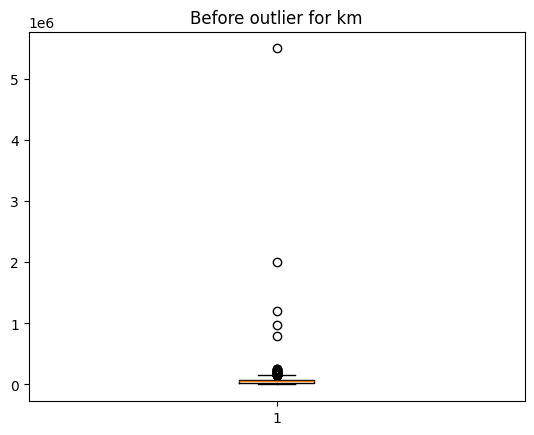

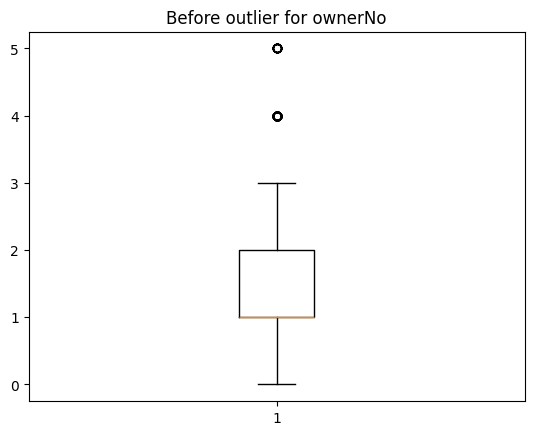

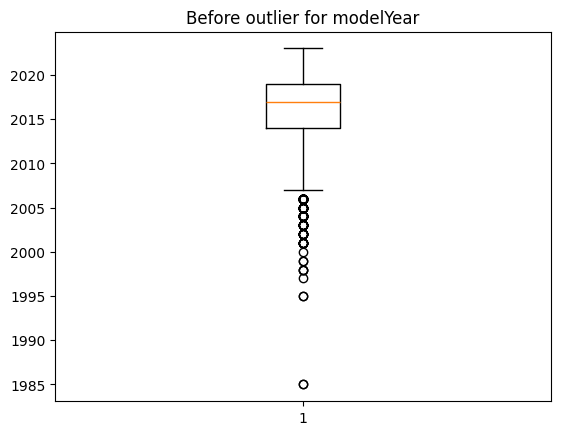

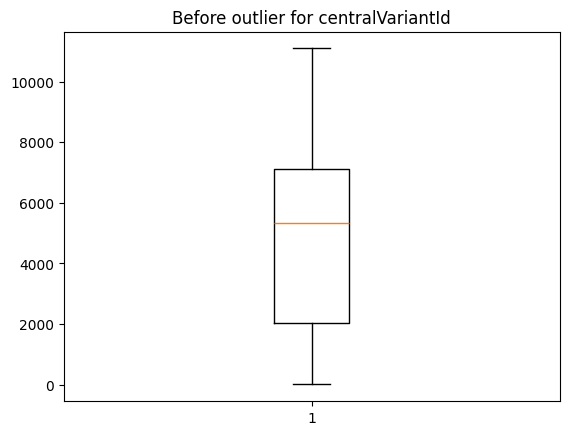

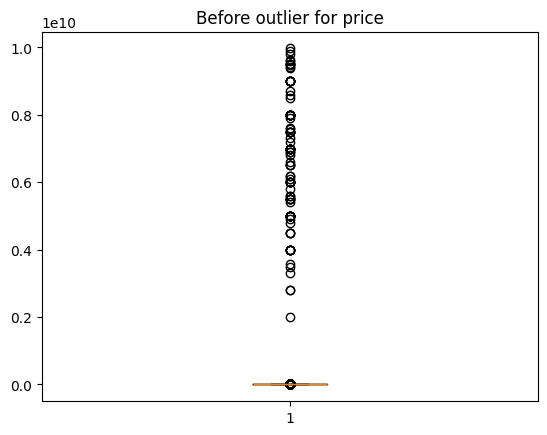

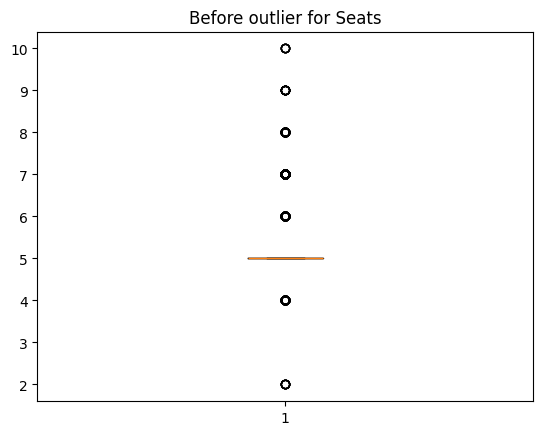

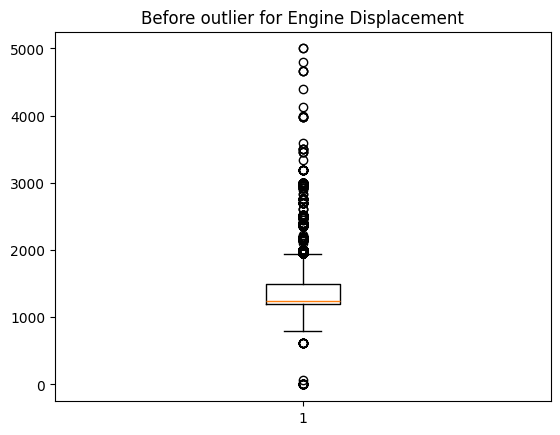

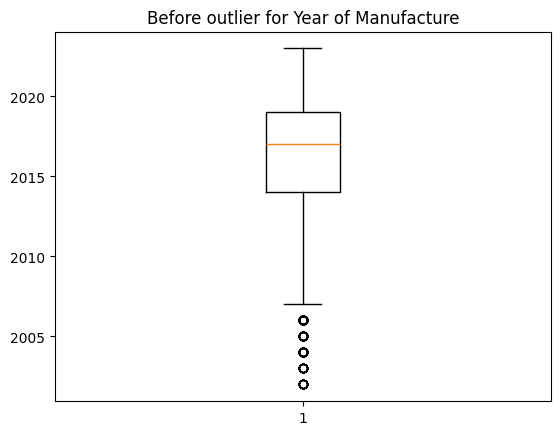

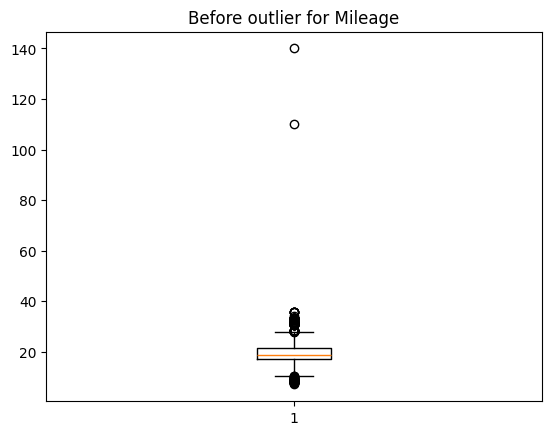

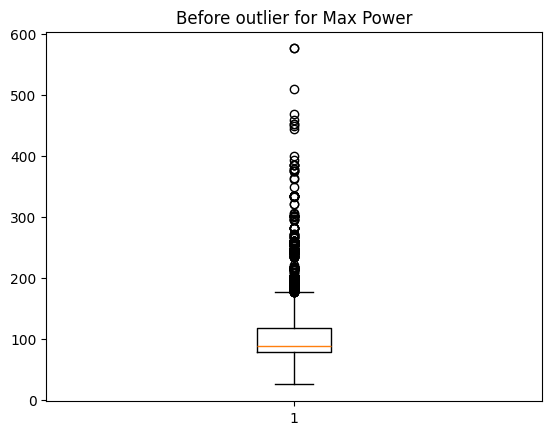

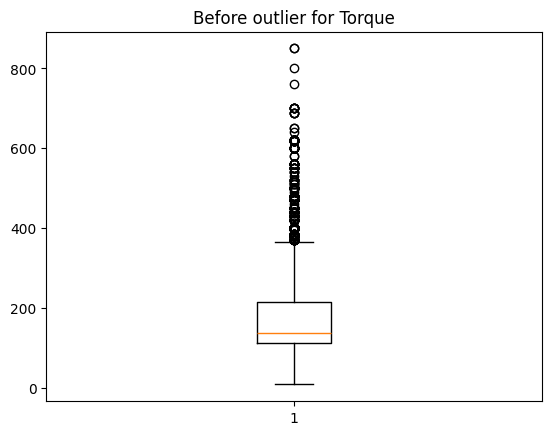

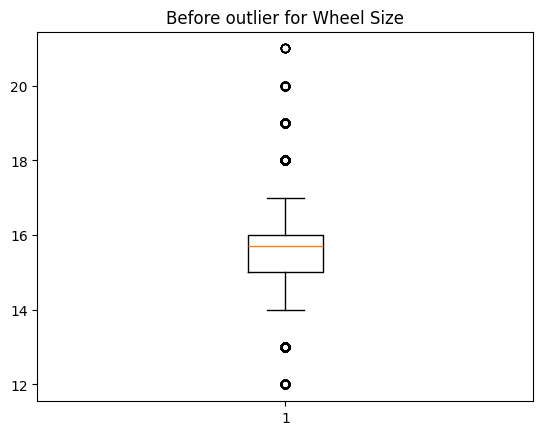

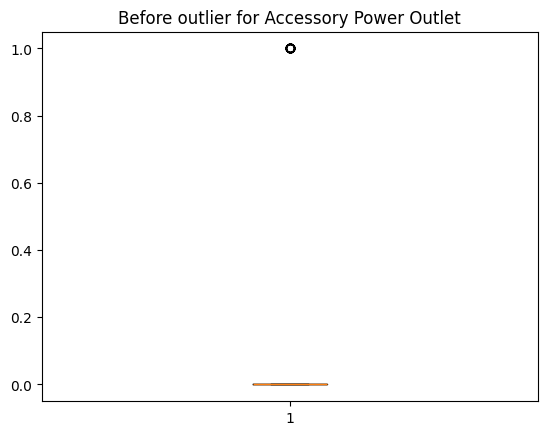

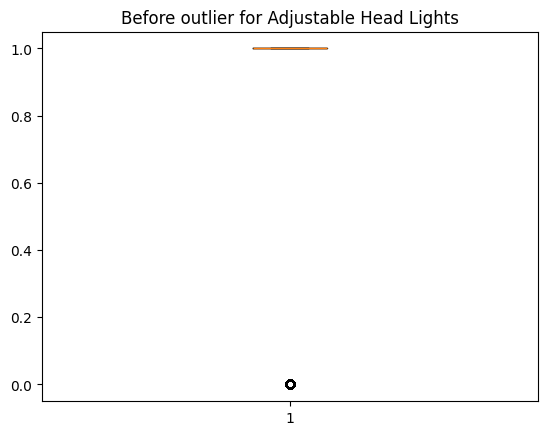

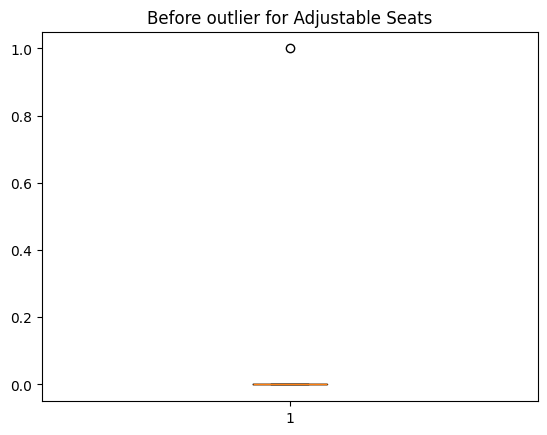

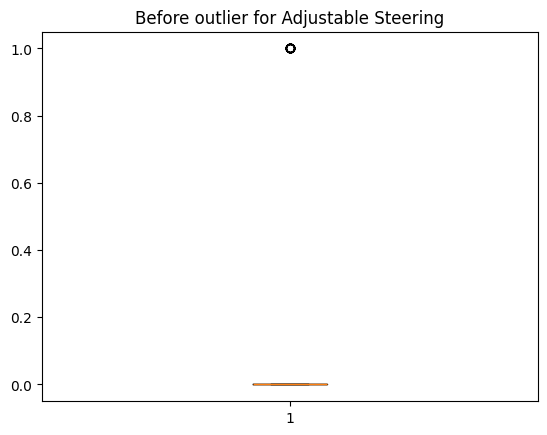

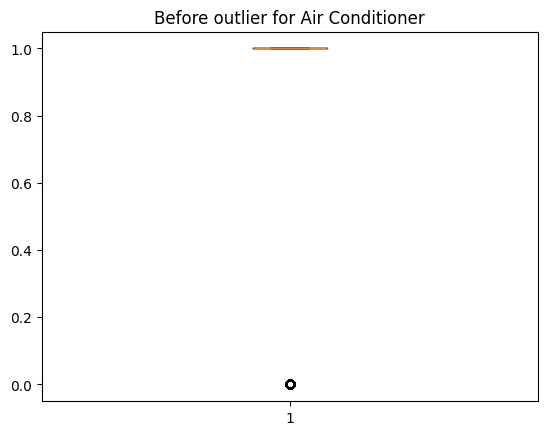

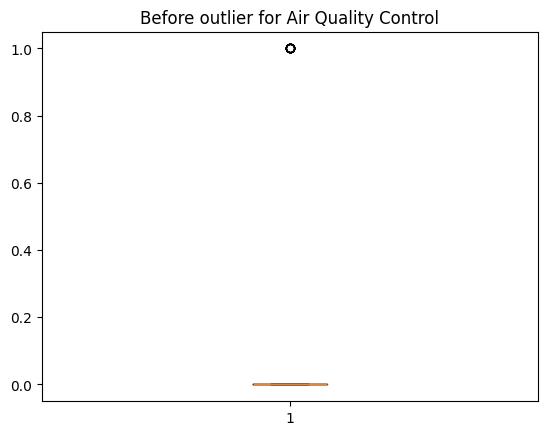

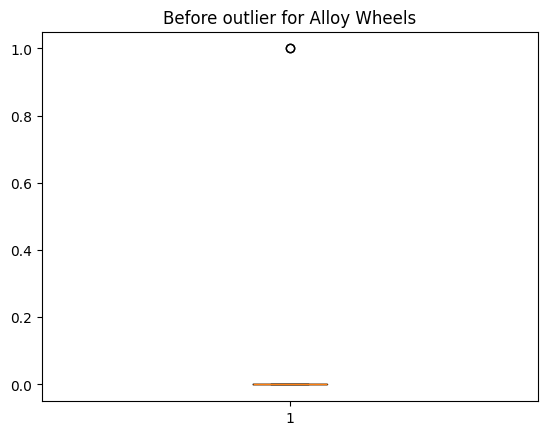

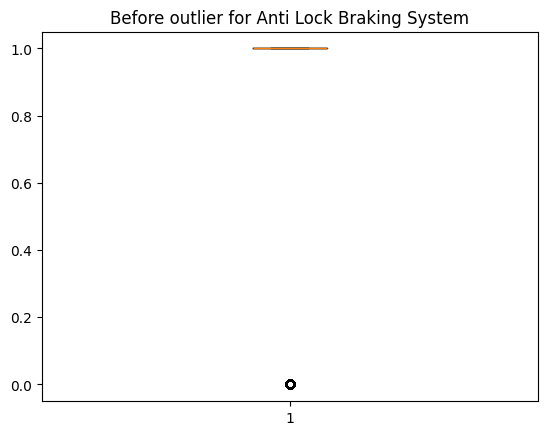

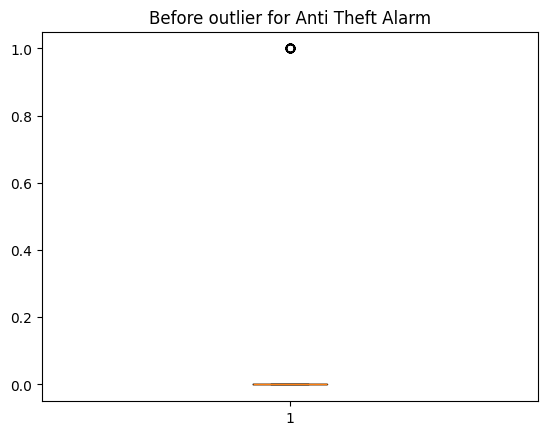

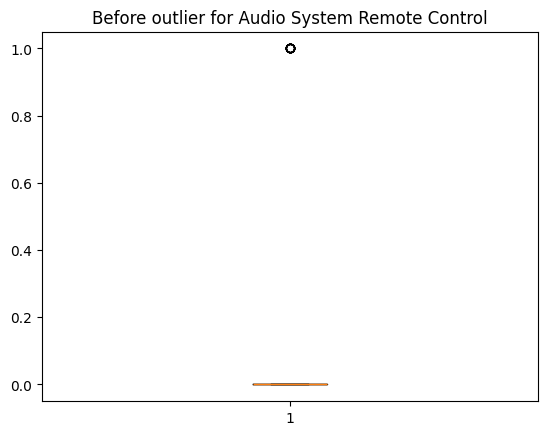

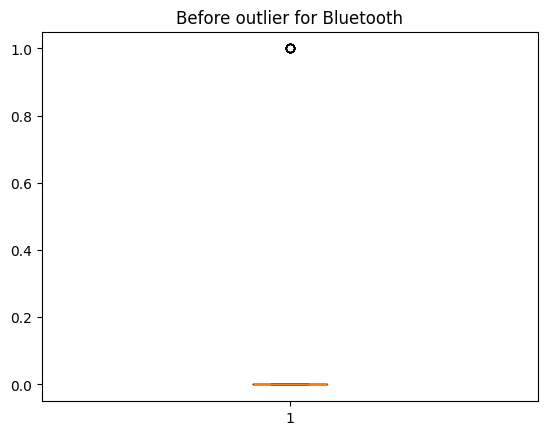

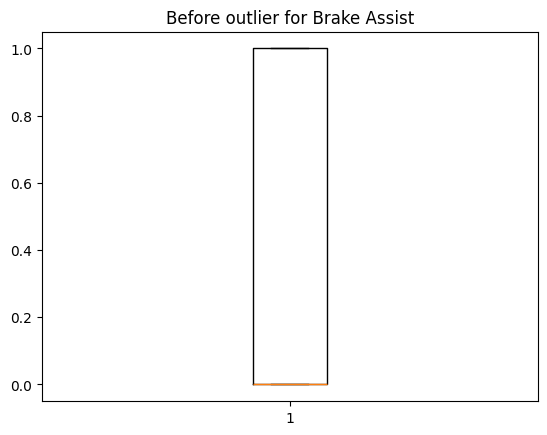

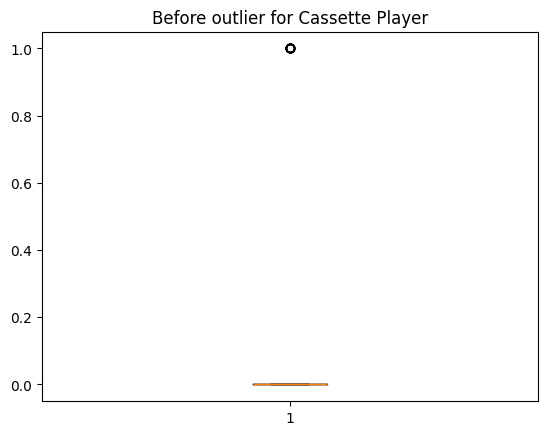

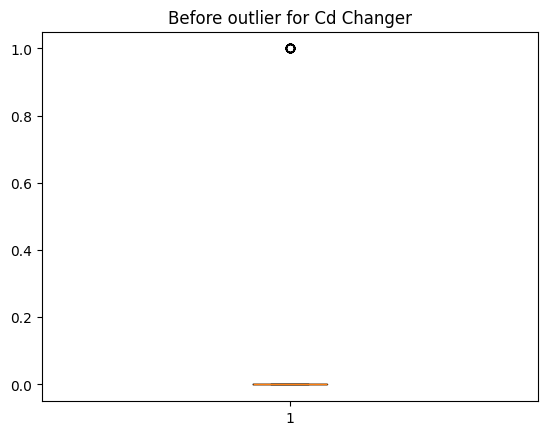

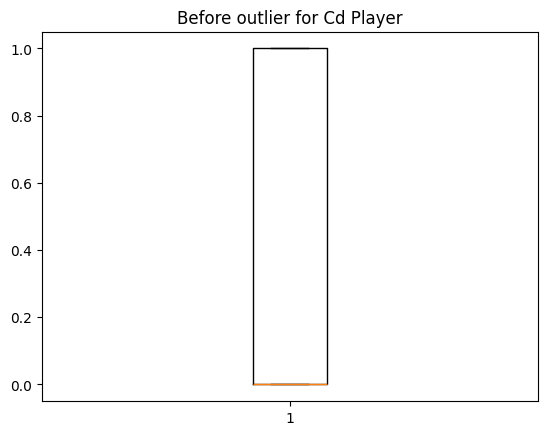

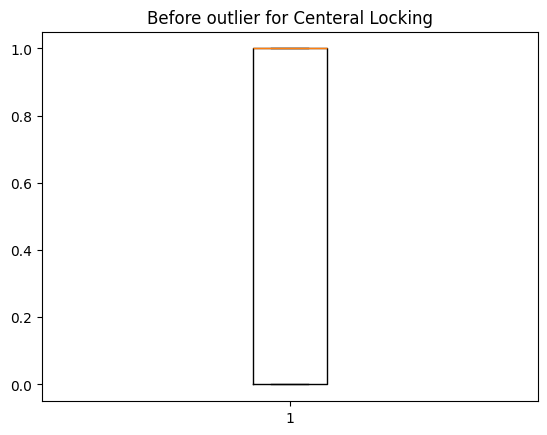

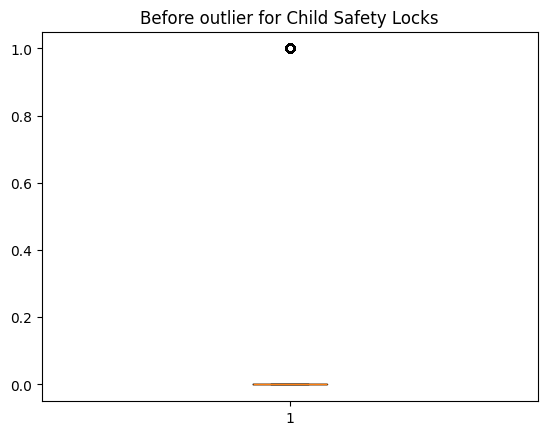

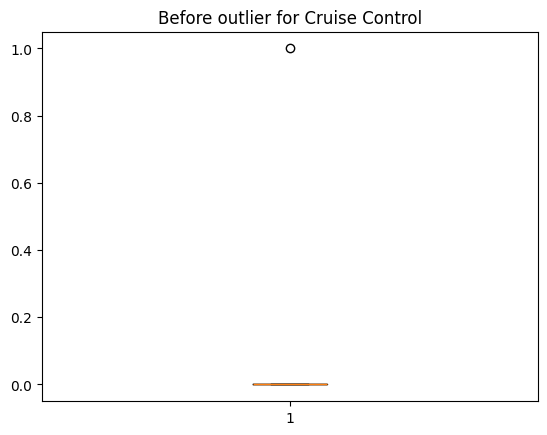

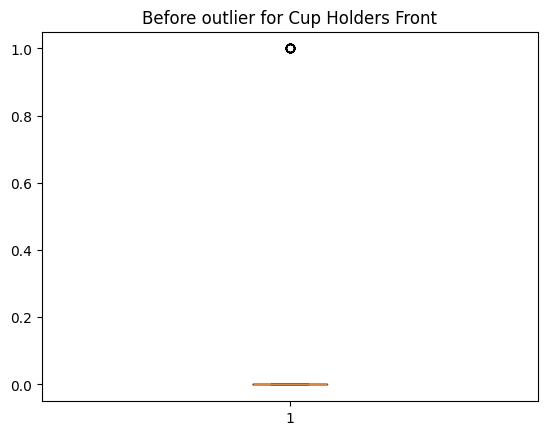

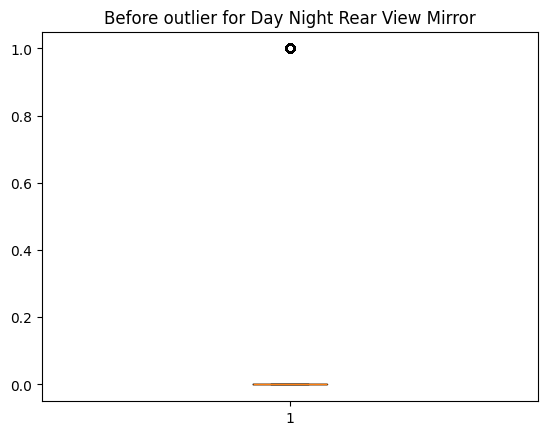

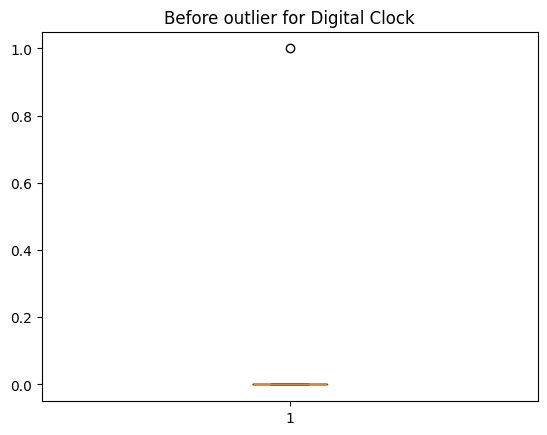

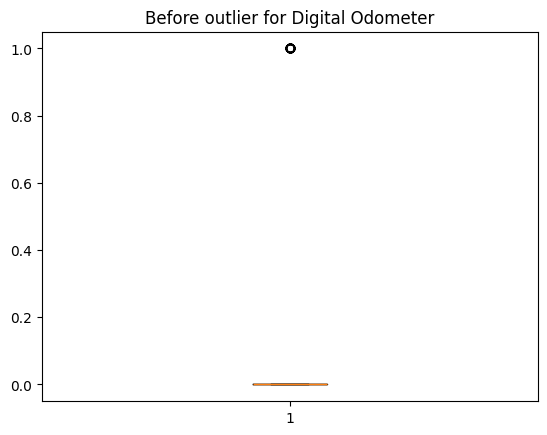

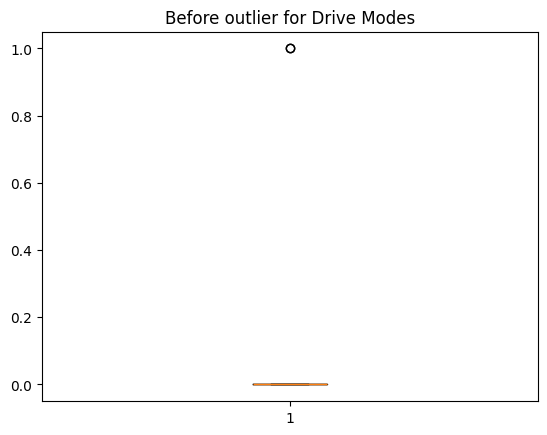

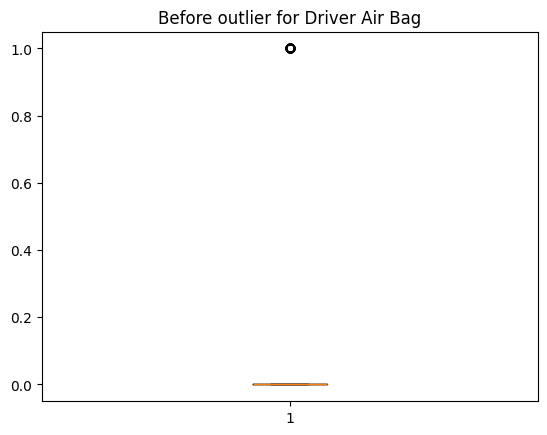

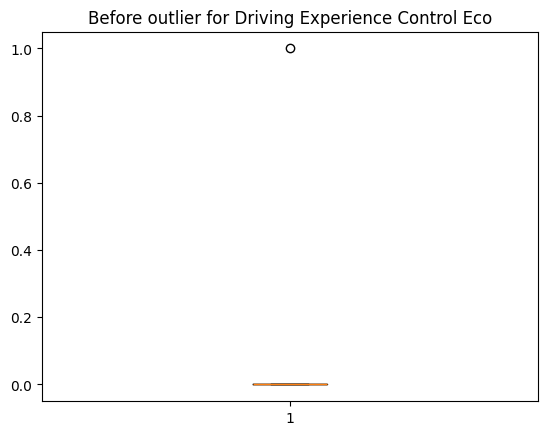

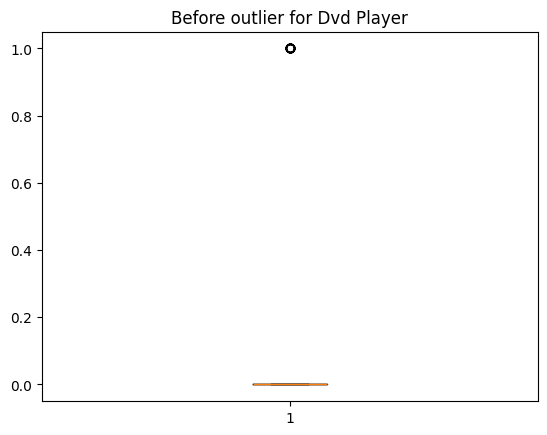

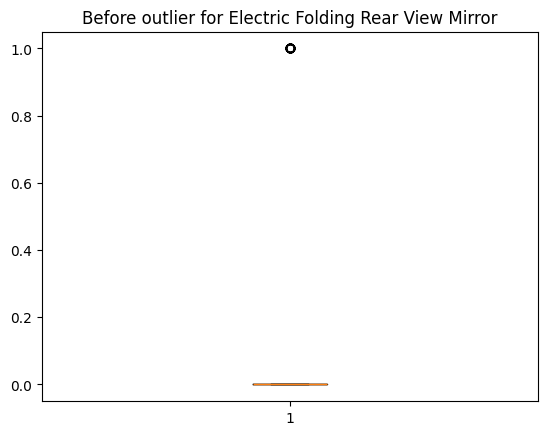

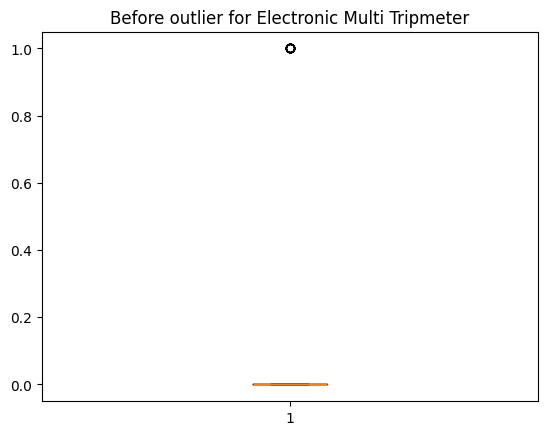

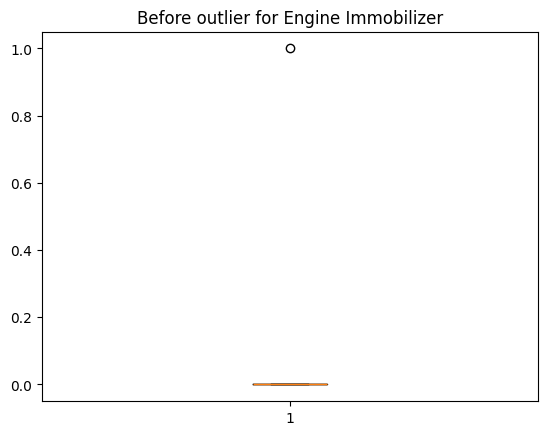

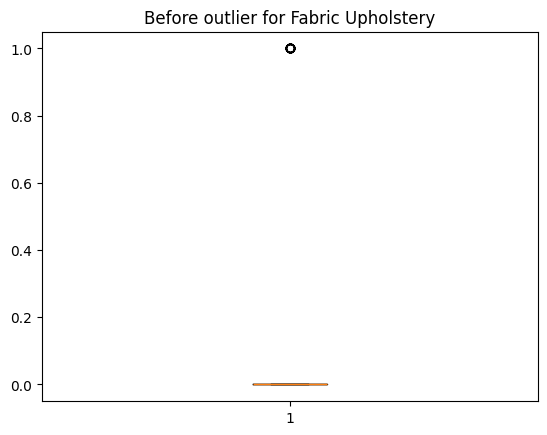

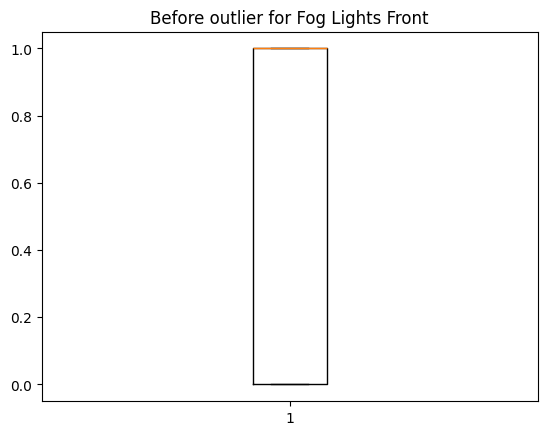

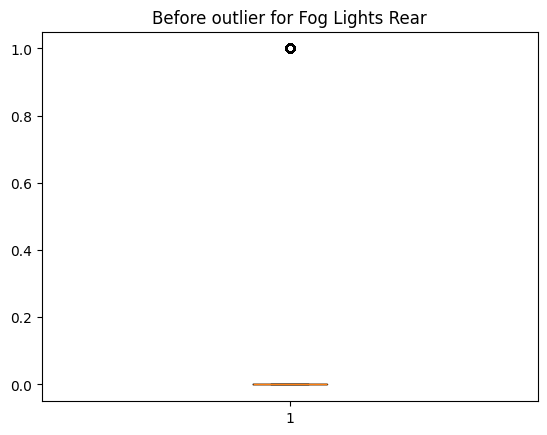

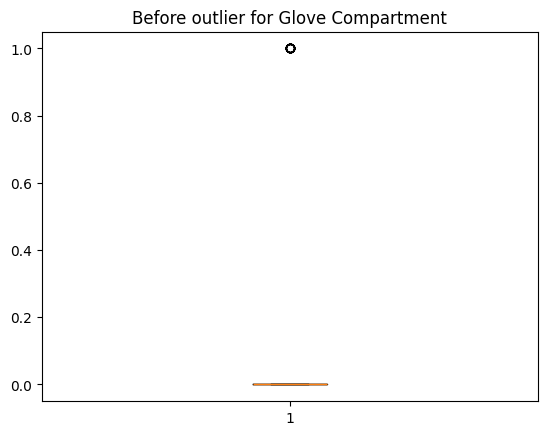

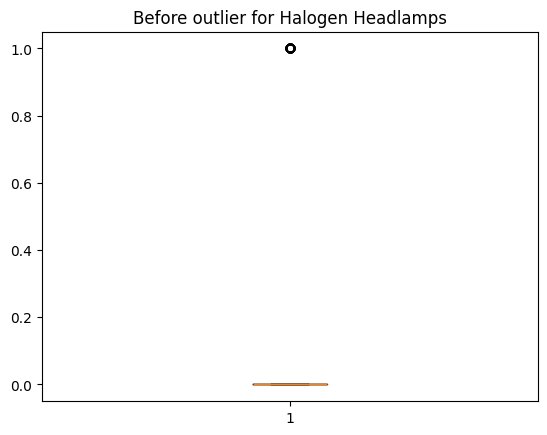

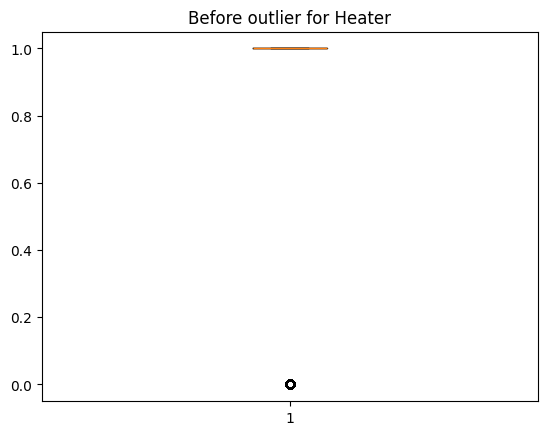

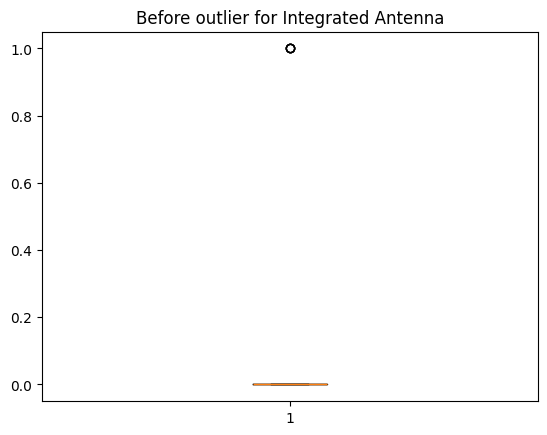

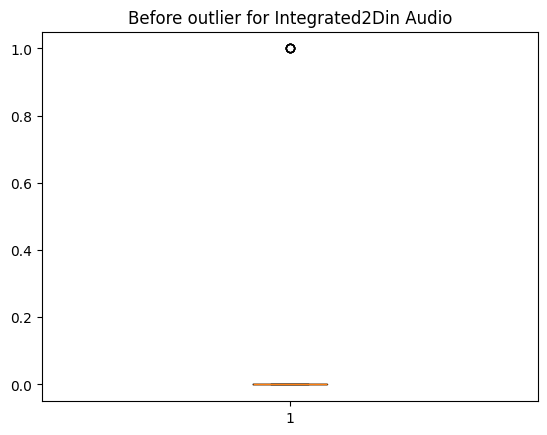

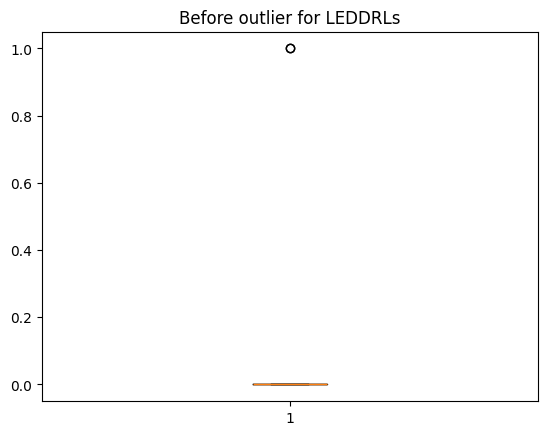

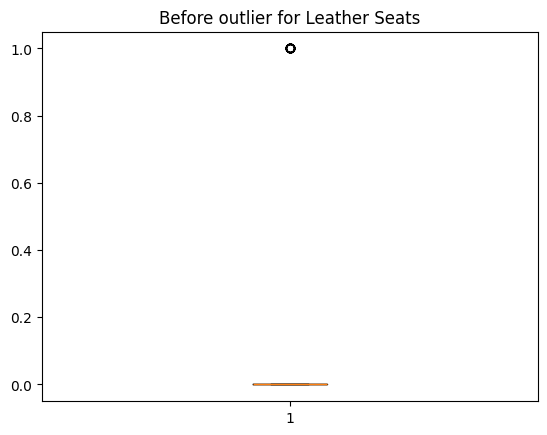

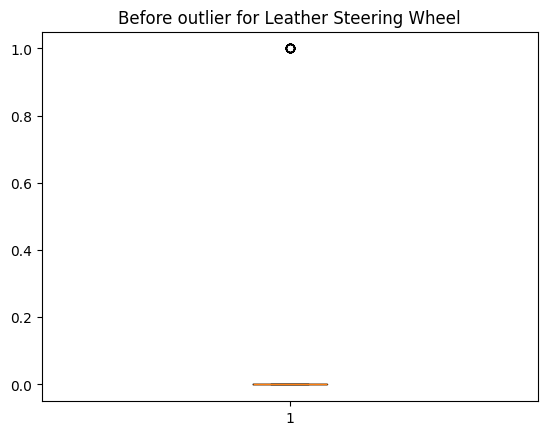

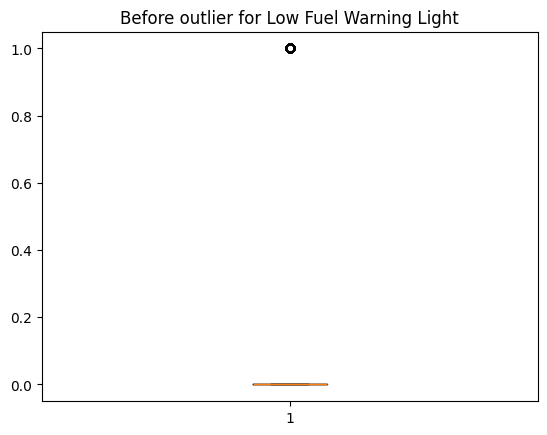

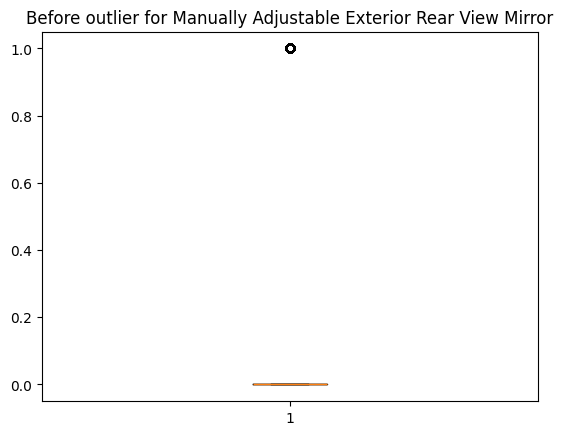

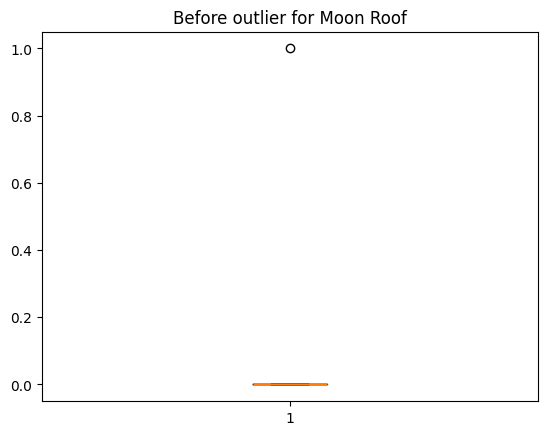

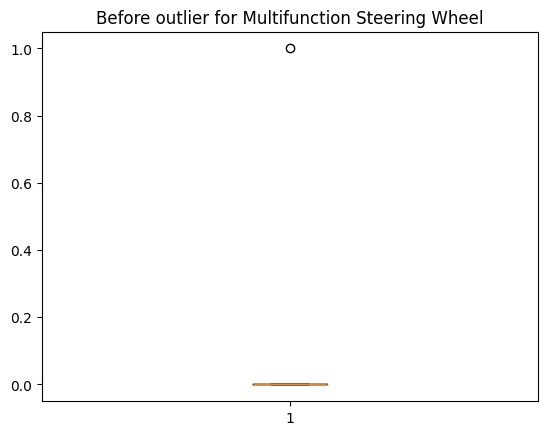

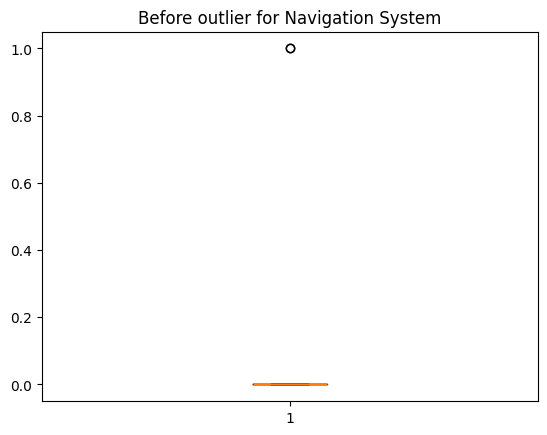

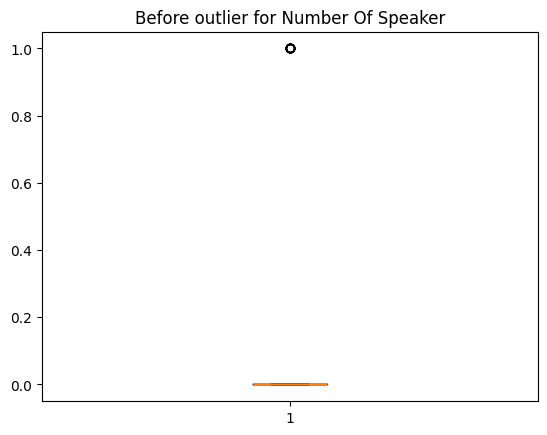

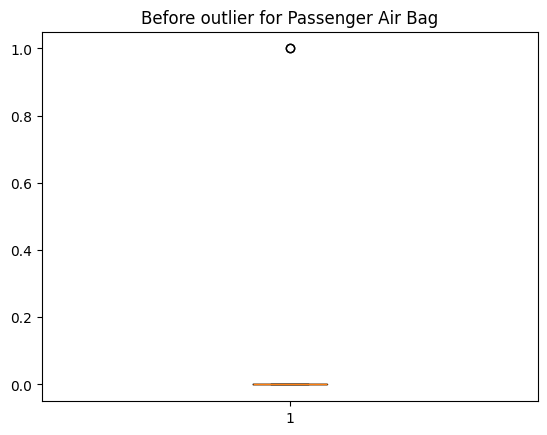

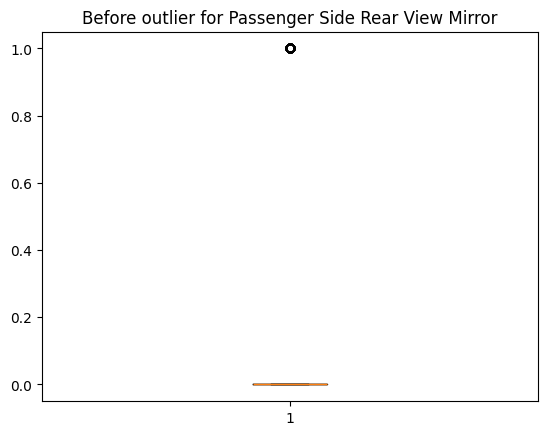

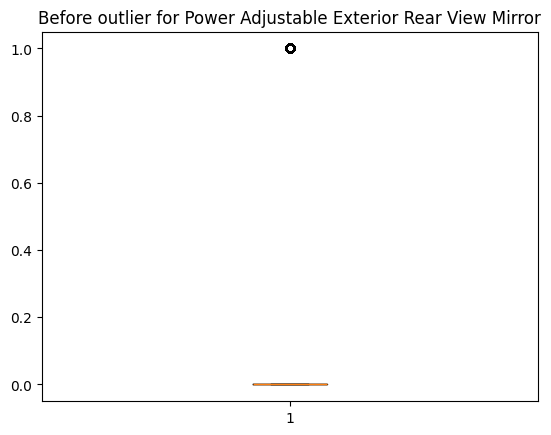

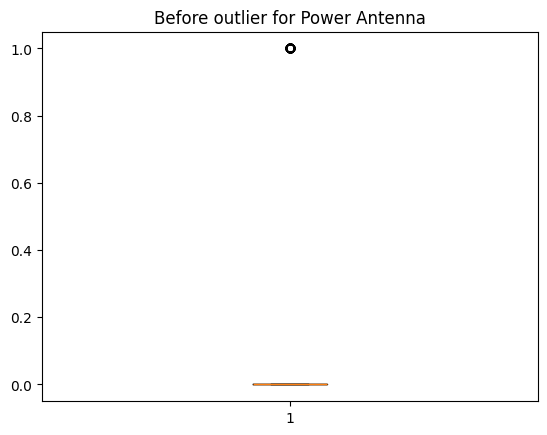

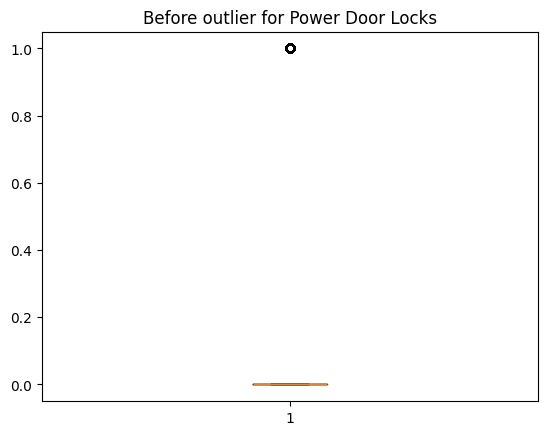

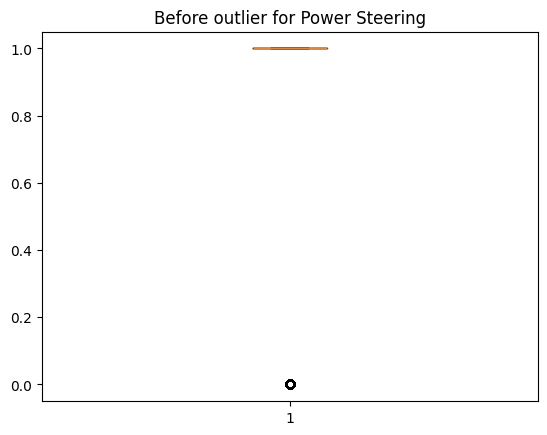

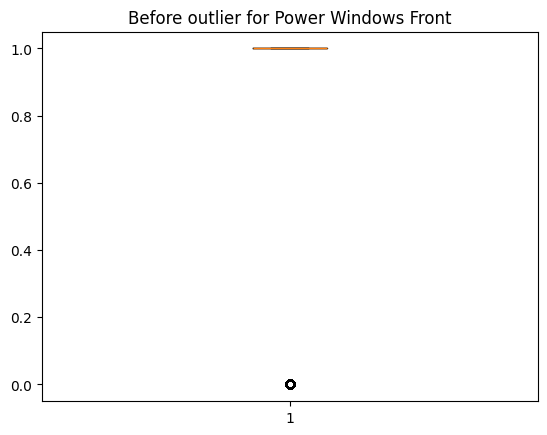

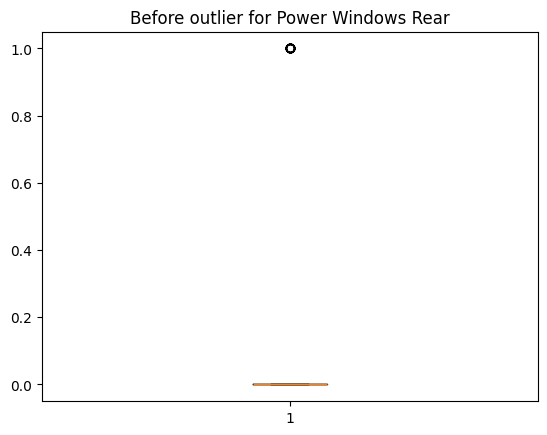

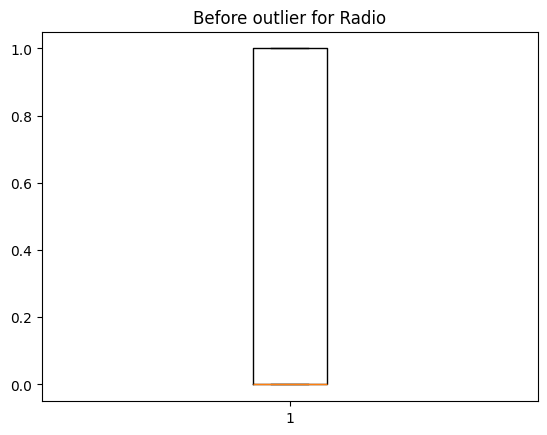

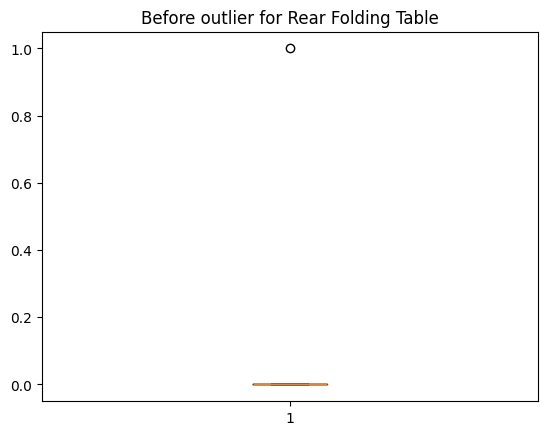

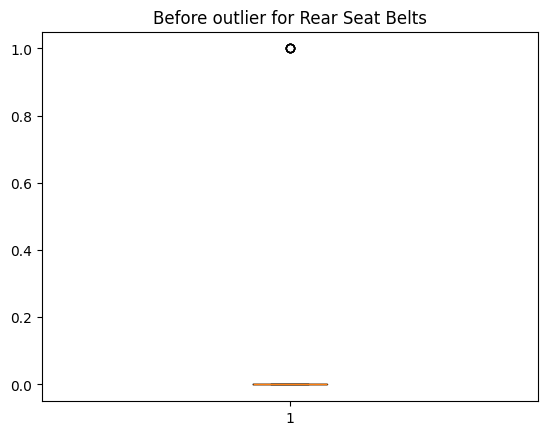

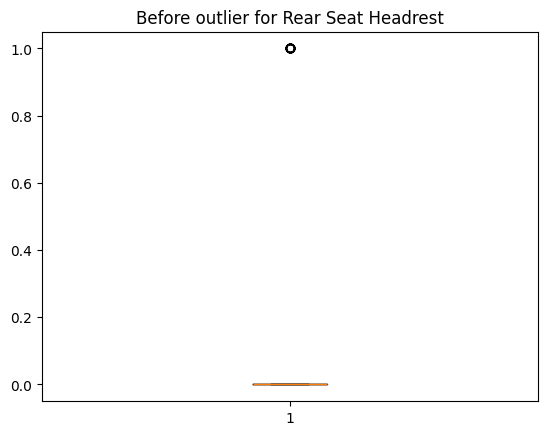

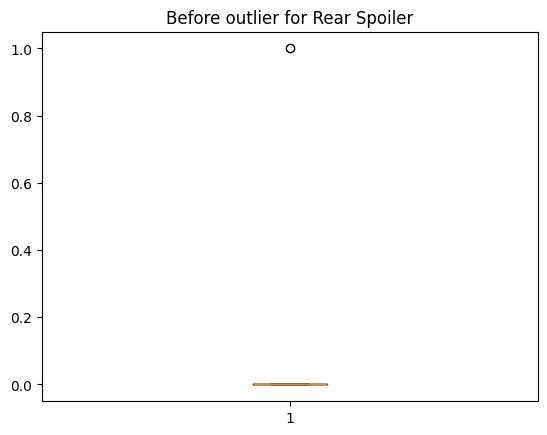

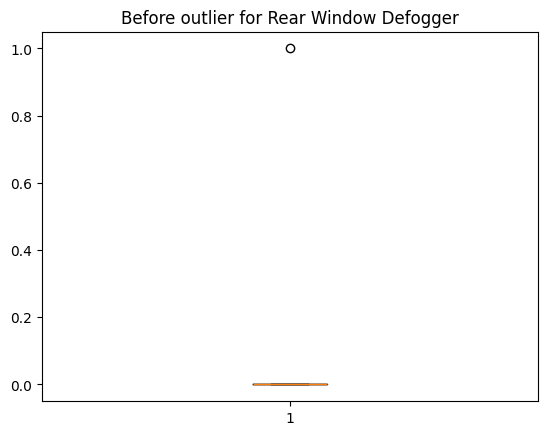

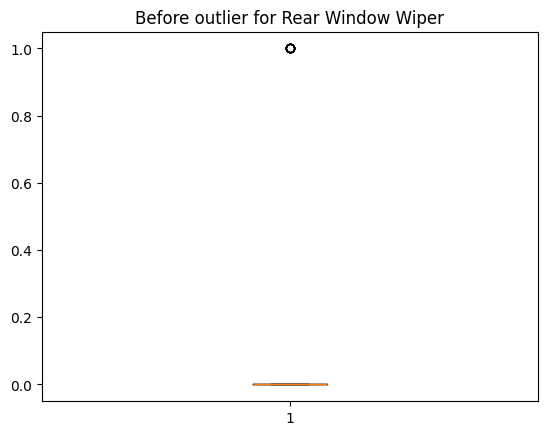

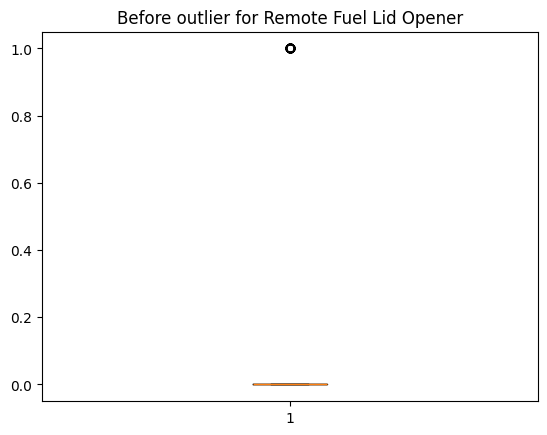

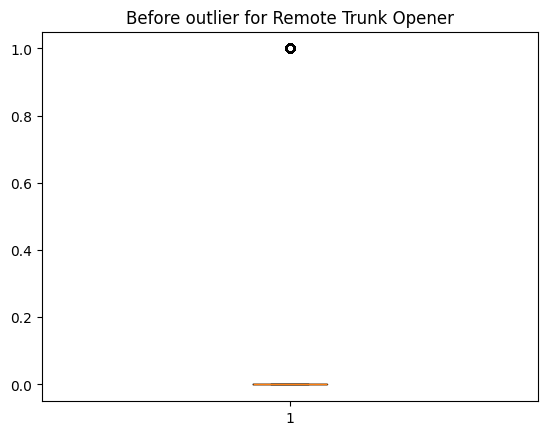

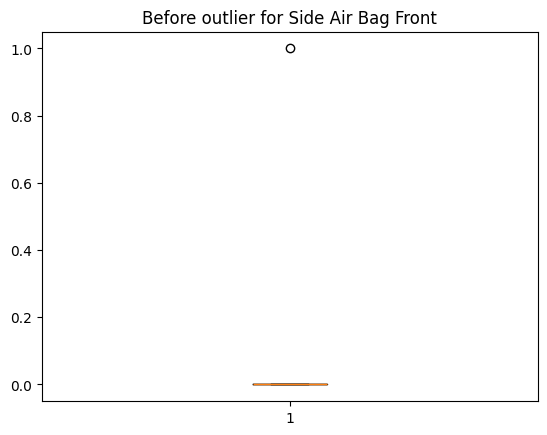

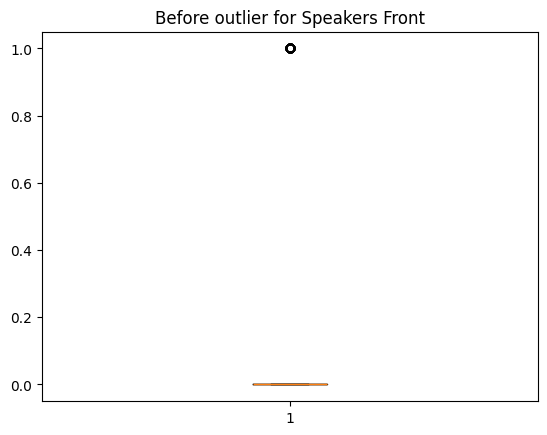

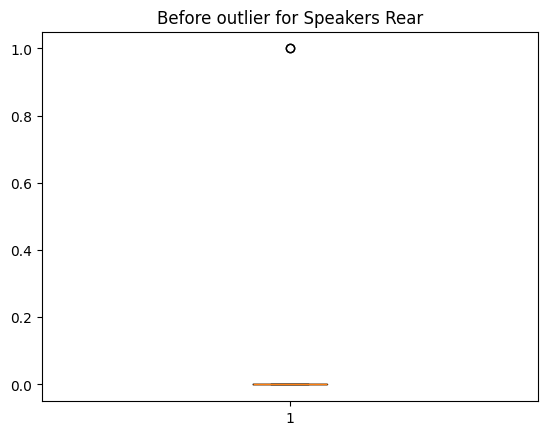

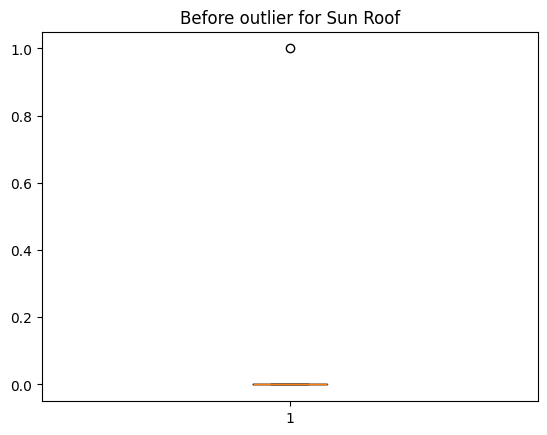

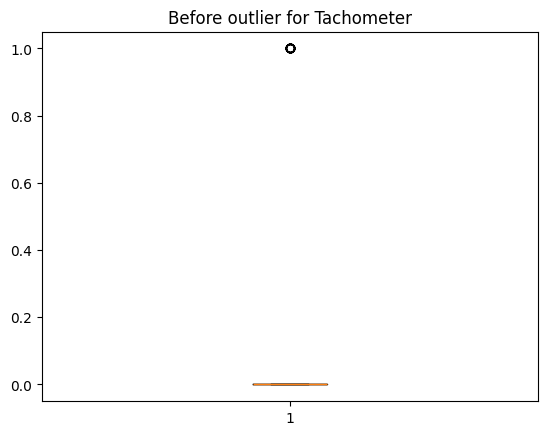

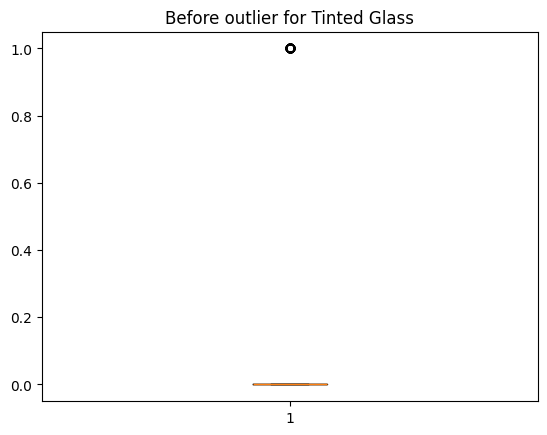

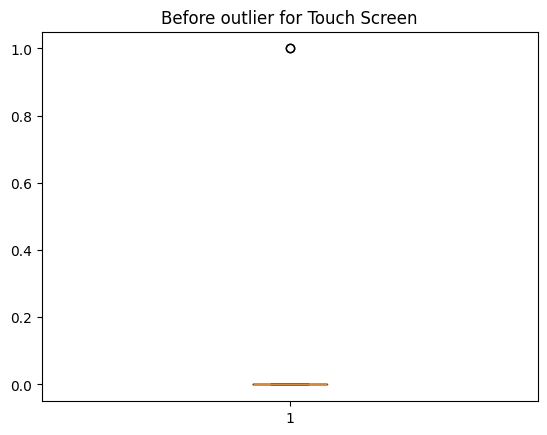

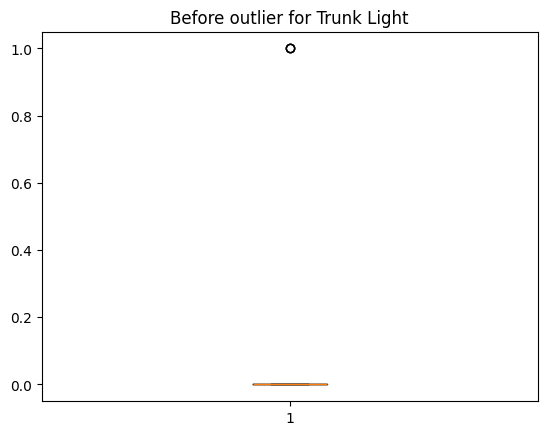

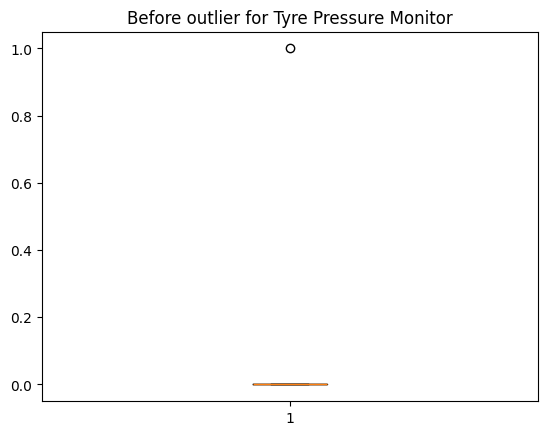

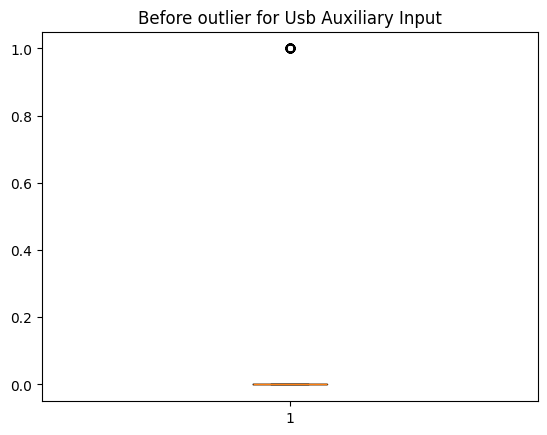

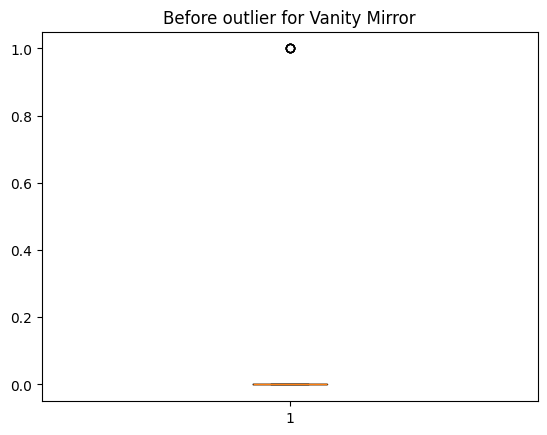

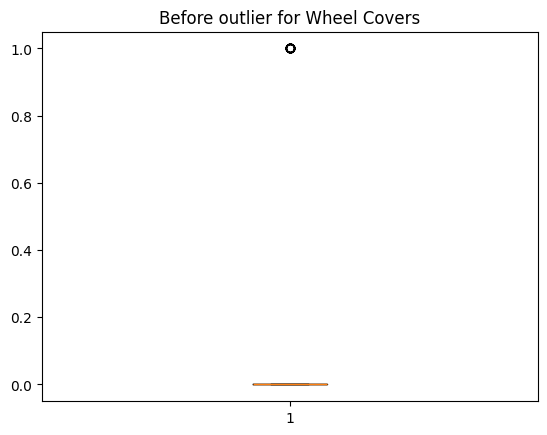

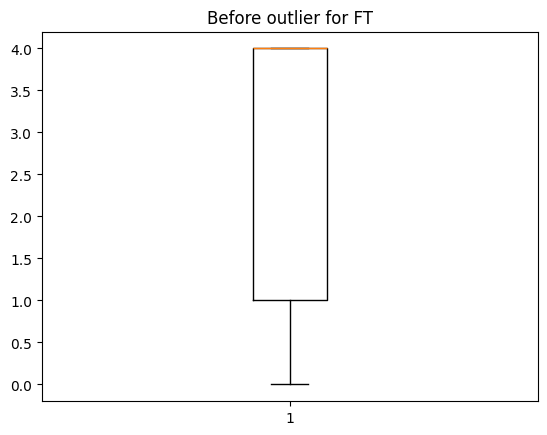

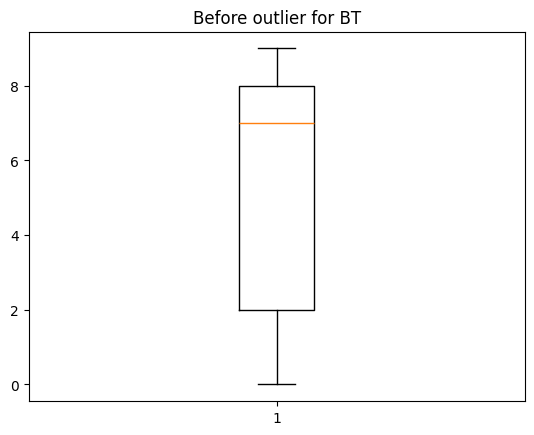

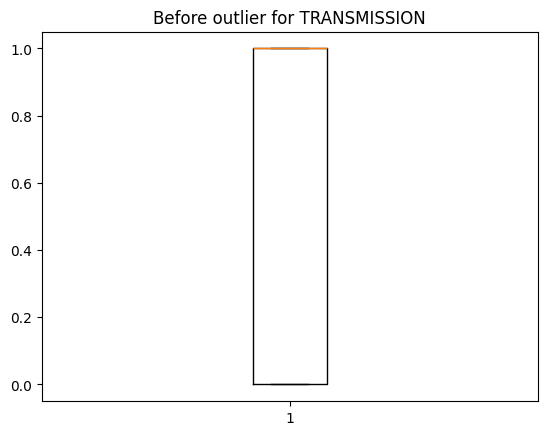

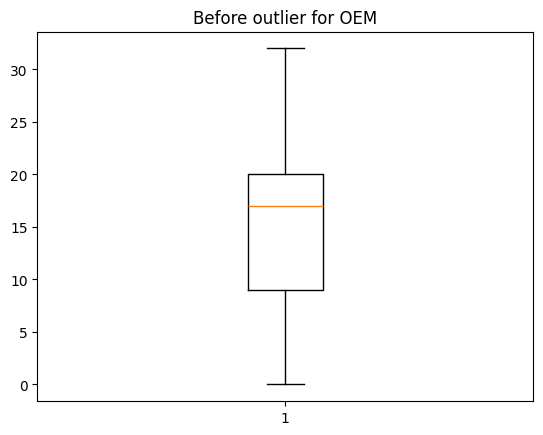

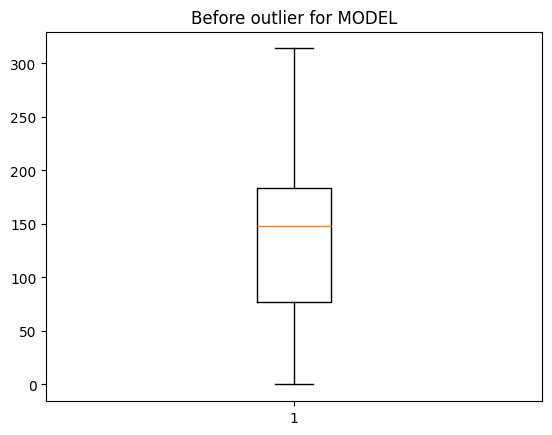

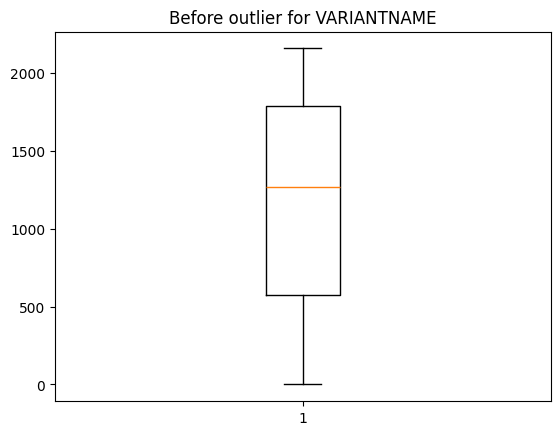

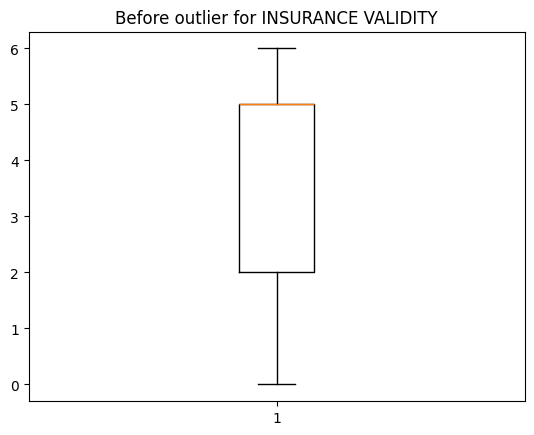

EXCEPTION COLIMNS ['Registration Year']


In [893]:
ex_col=[]
for x in df.columns:
   try:
        detect_remove_outliers(df , x)
   except:
       ex_col.append(x)
print("EXCEPTION COLIMNS",ex_col)

#### Identifying distribution of each features (Univariate Analysis)

In [894]:
def draw_hist(df,column):
        sns.kdeplot(df[column],color='blue', linewidth=2)
        plt.title("Distribution of " + column)
        plt.show()

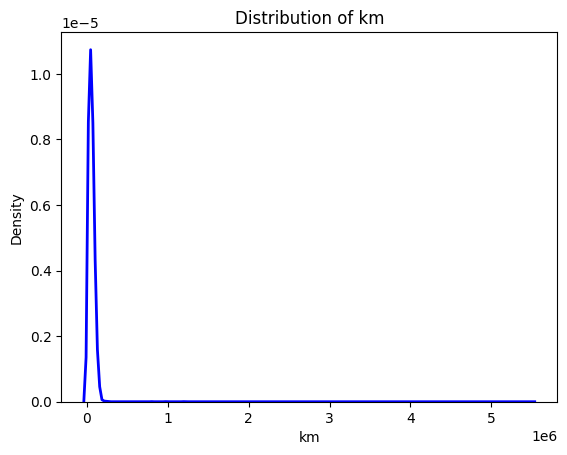

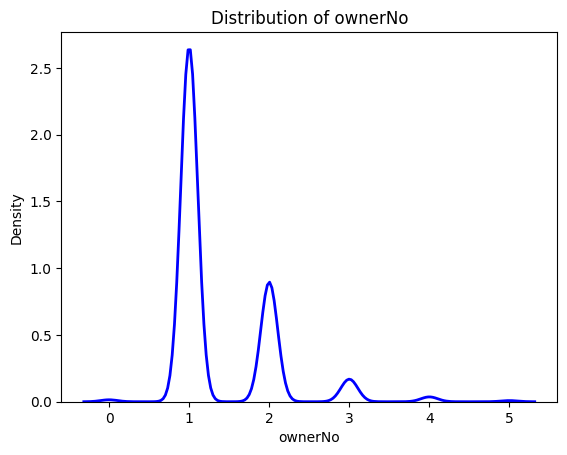

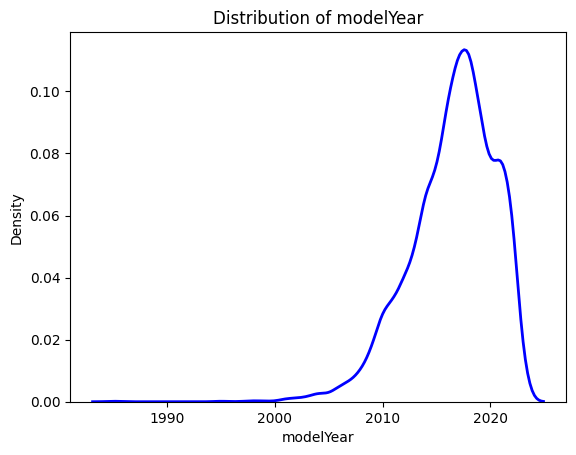

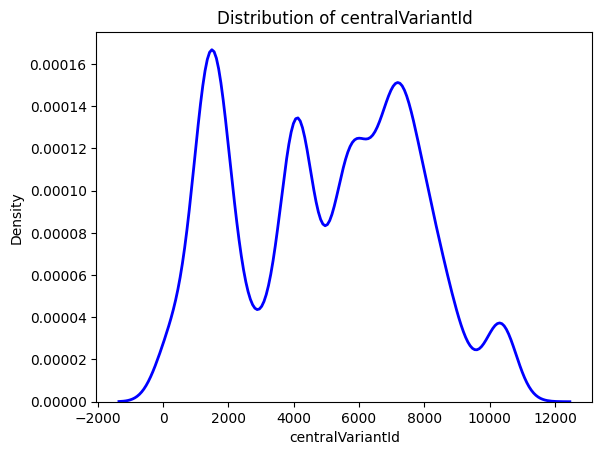

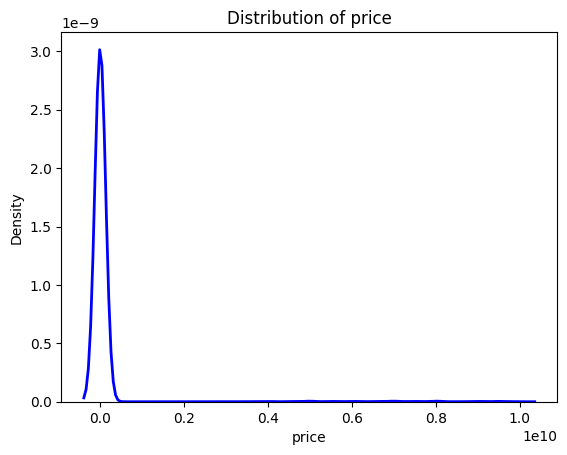

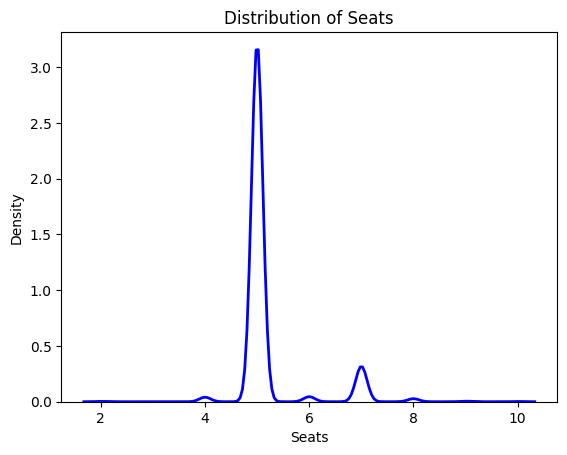

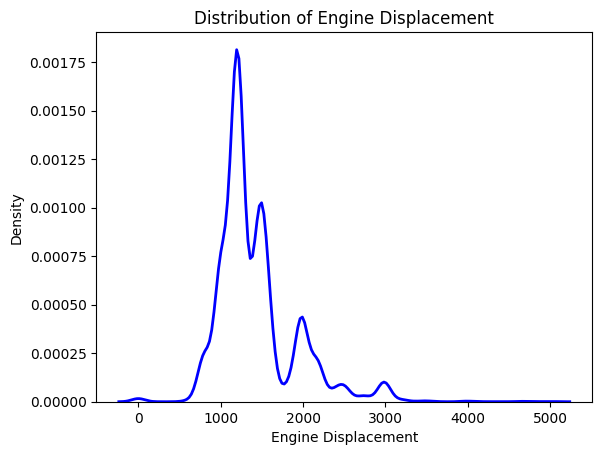

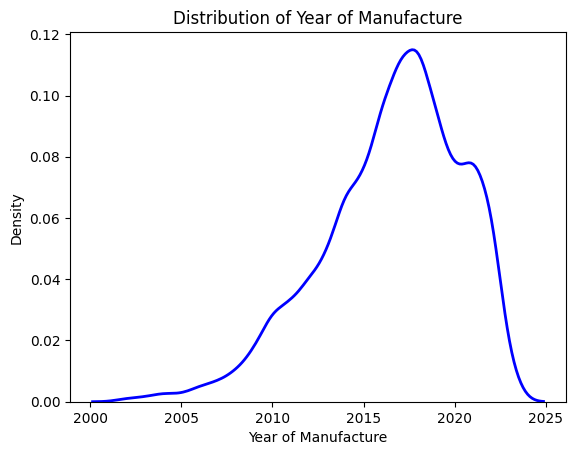

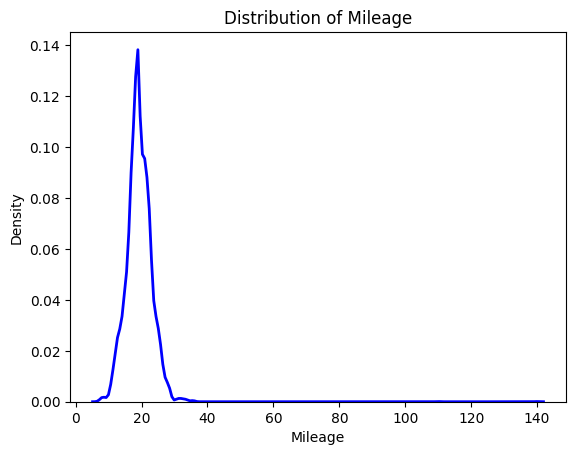

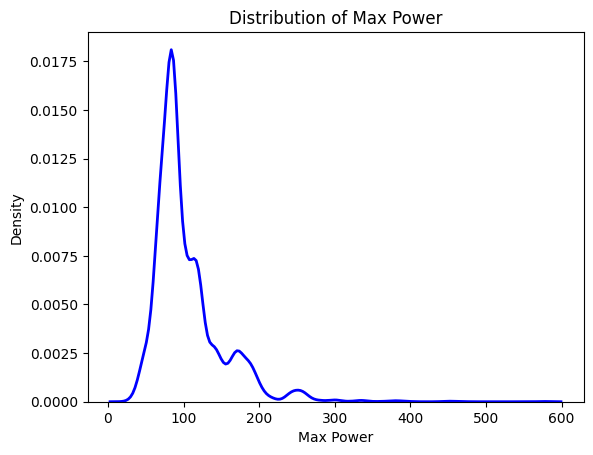

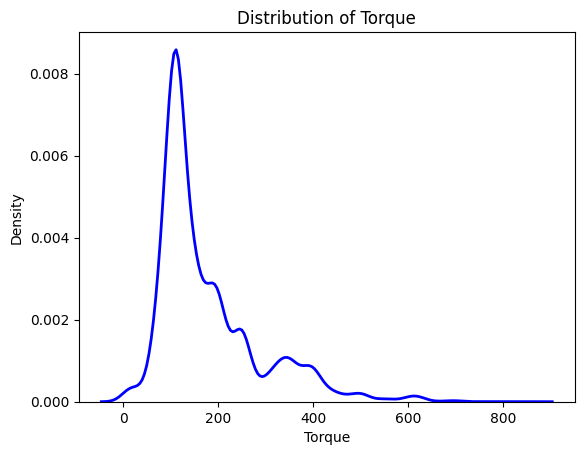

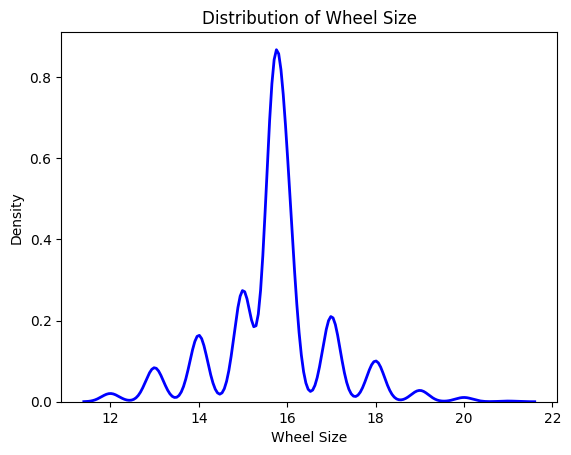

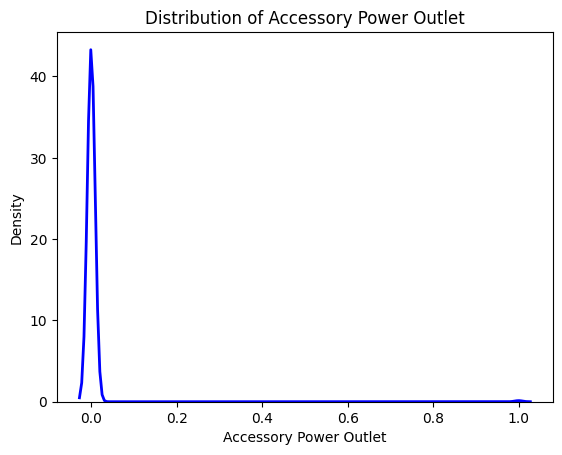

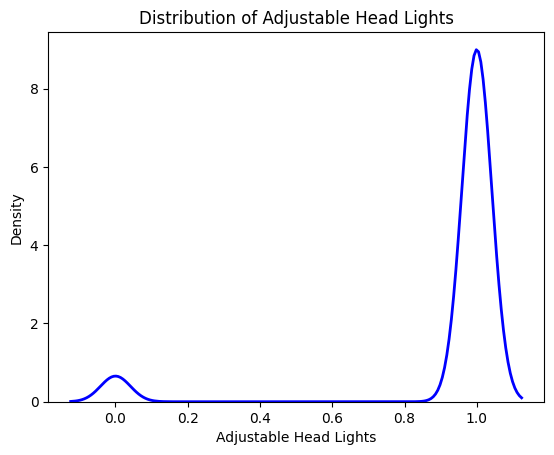

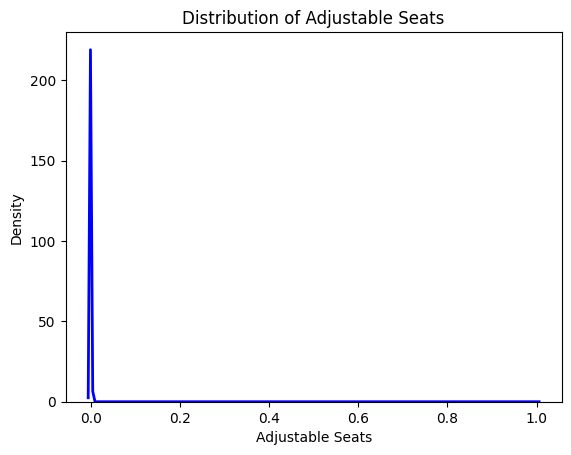

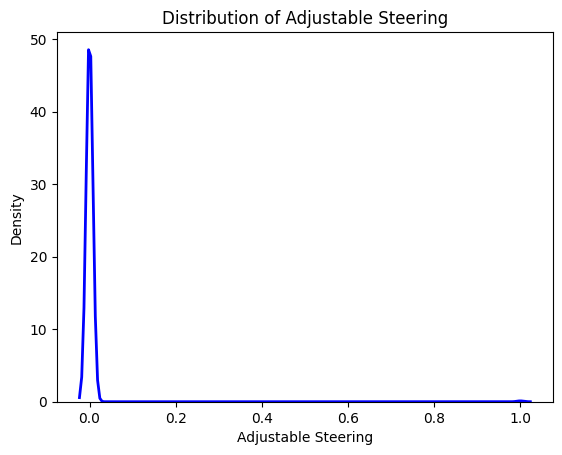

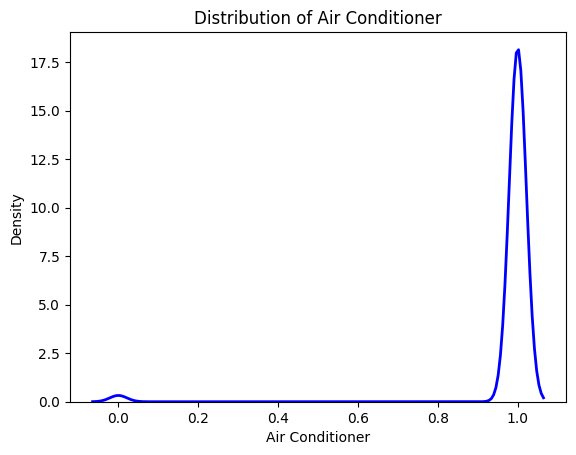

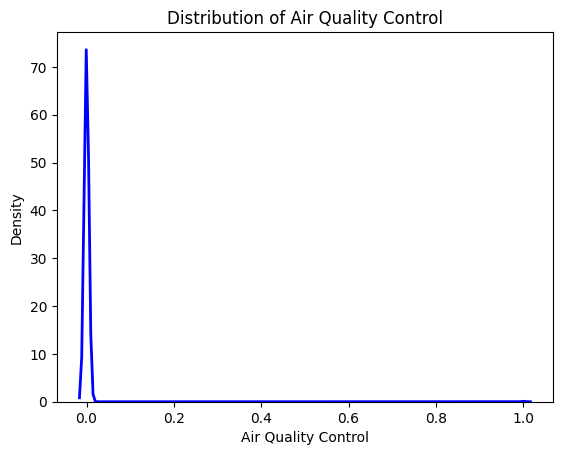

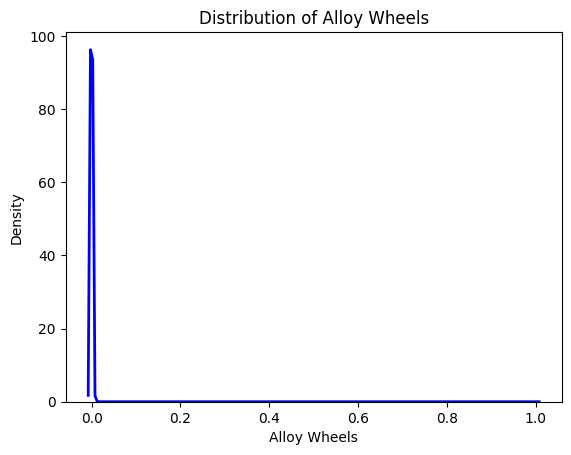

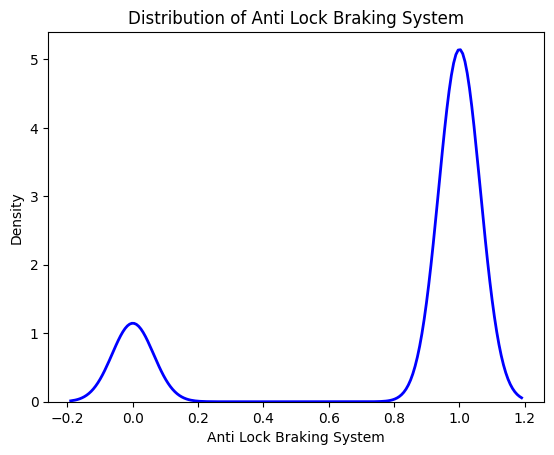

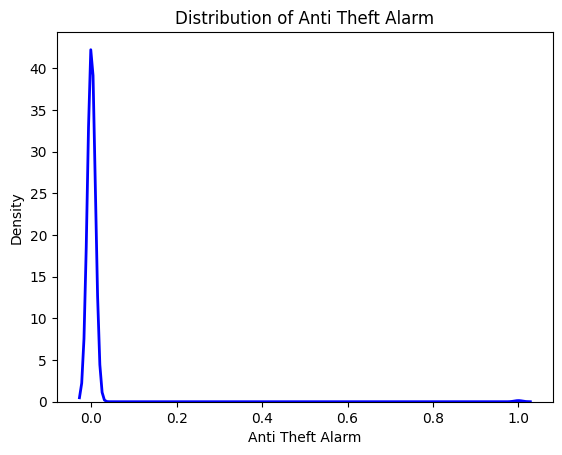

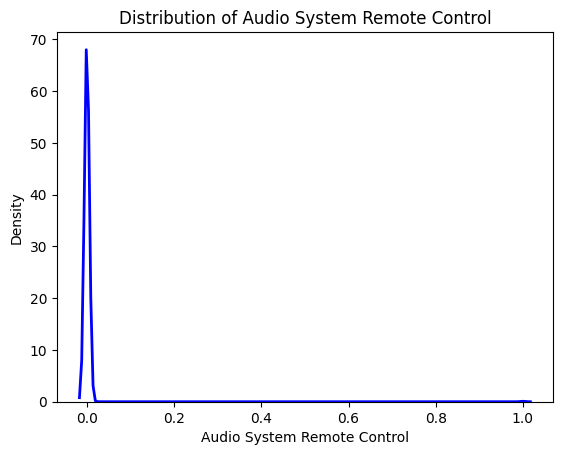

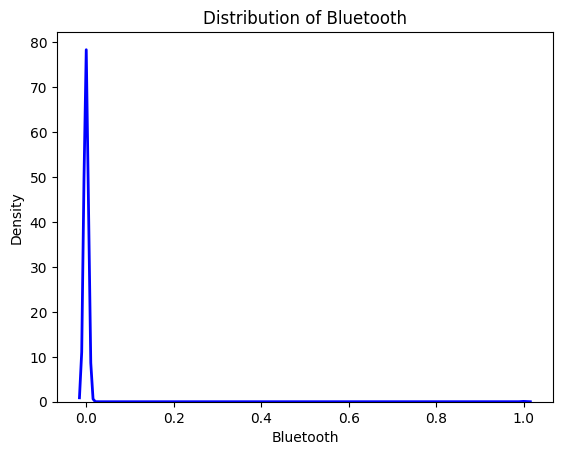

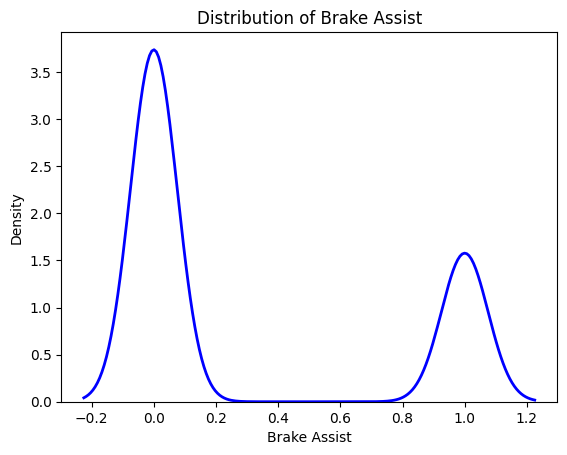

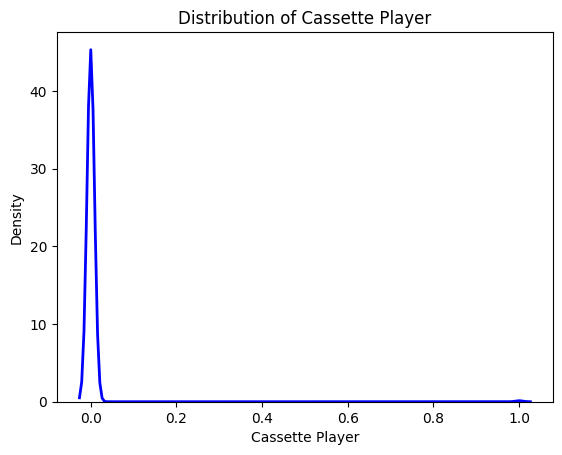

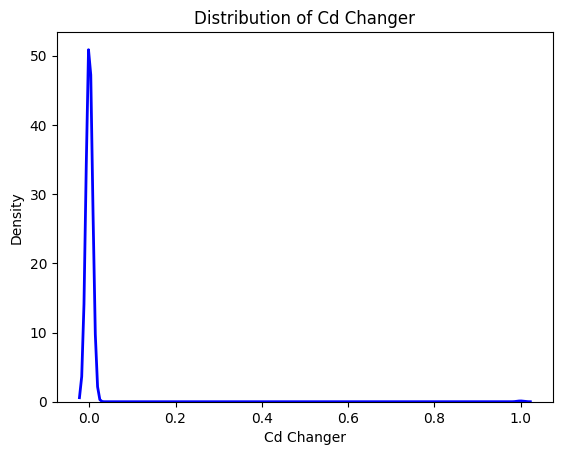

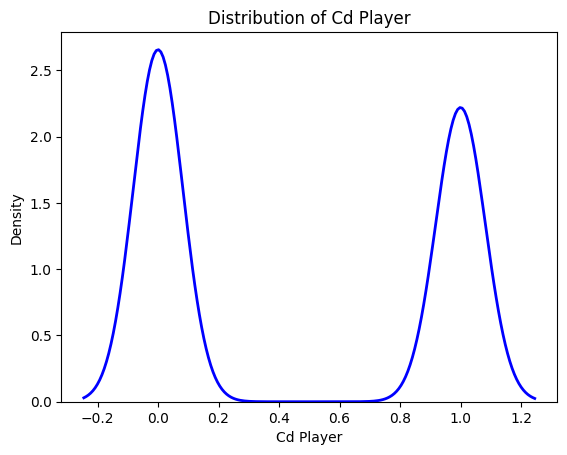

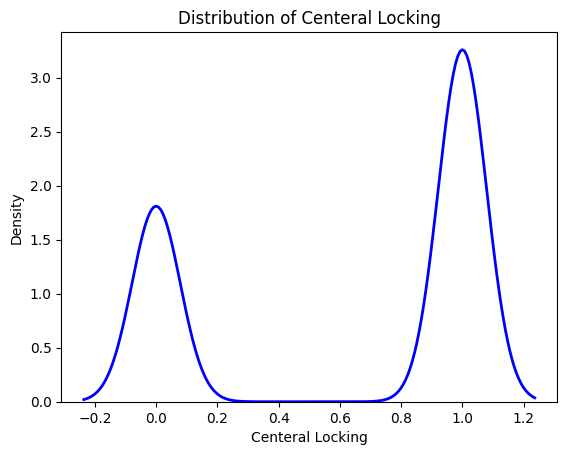

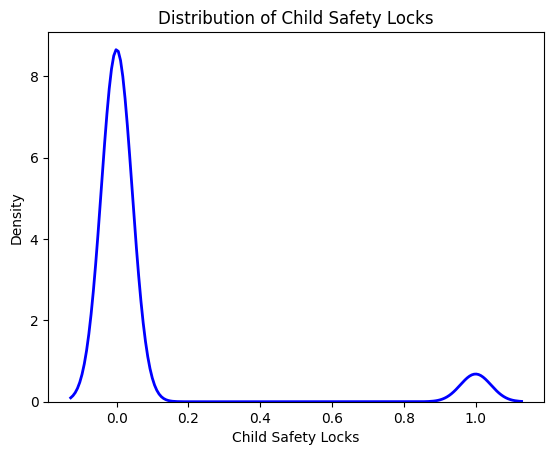

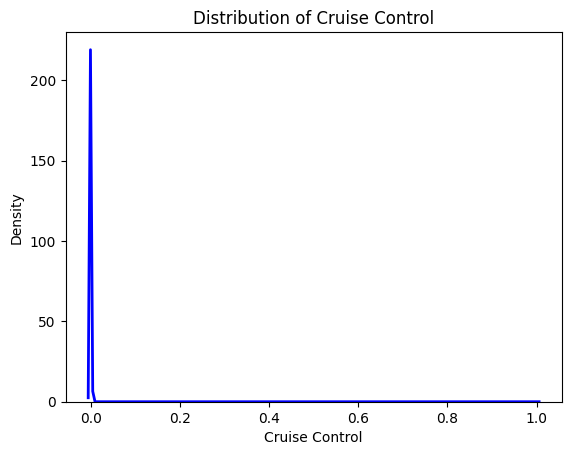

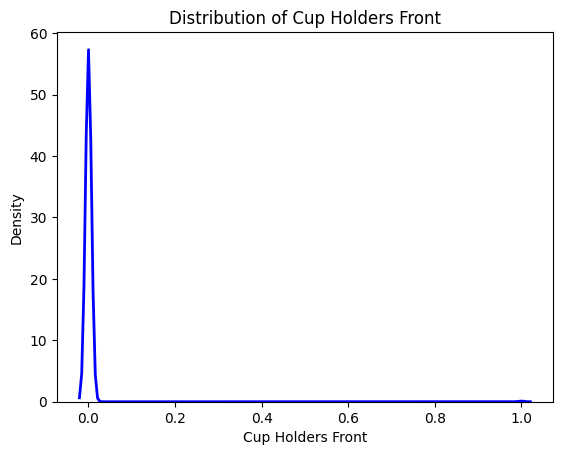

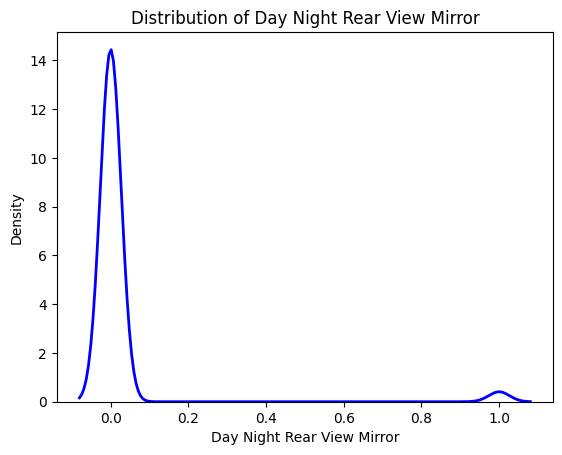

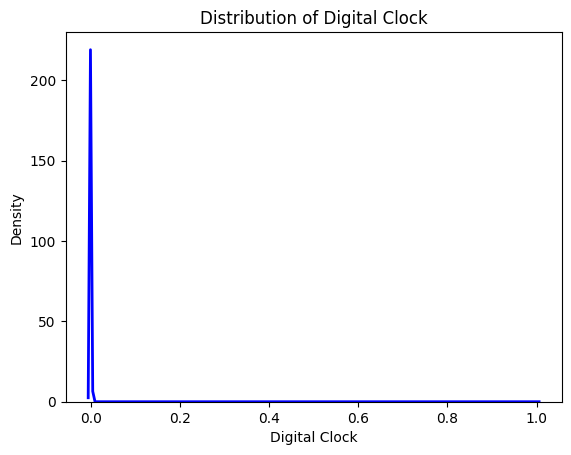

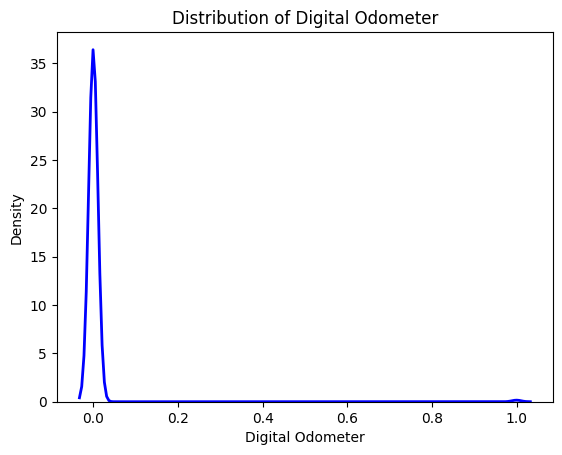

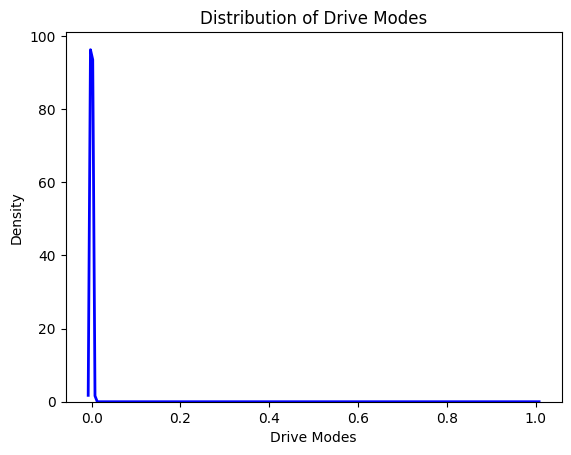

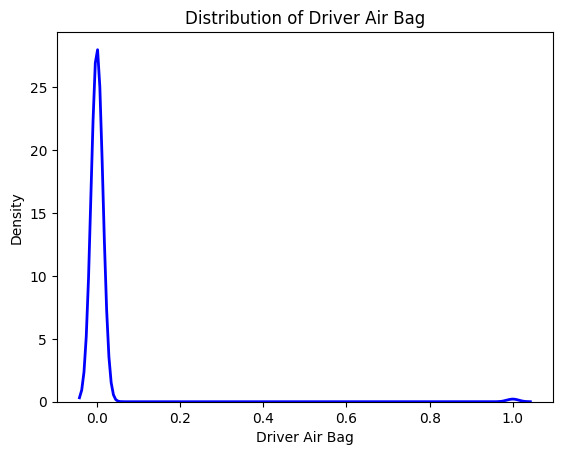

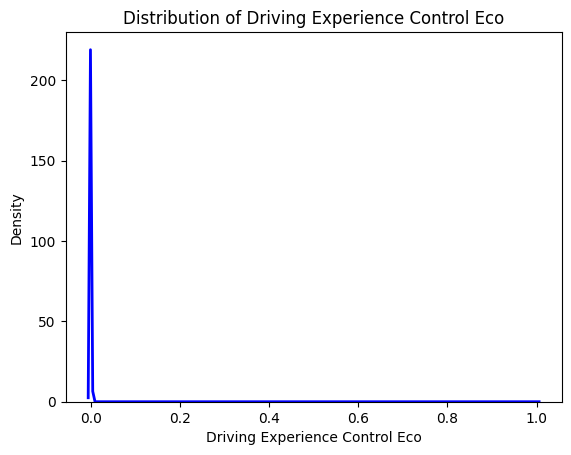

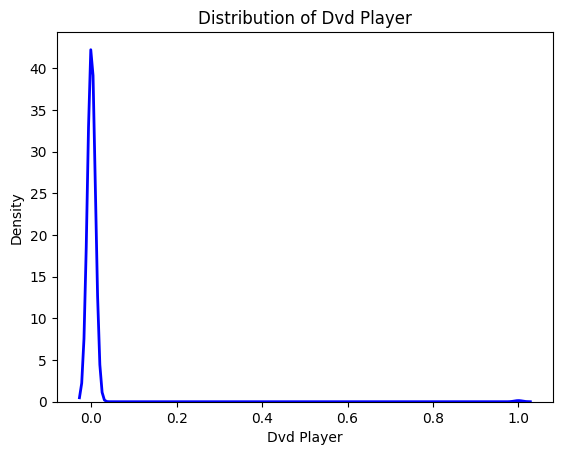

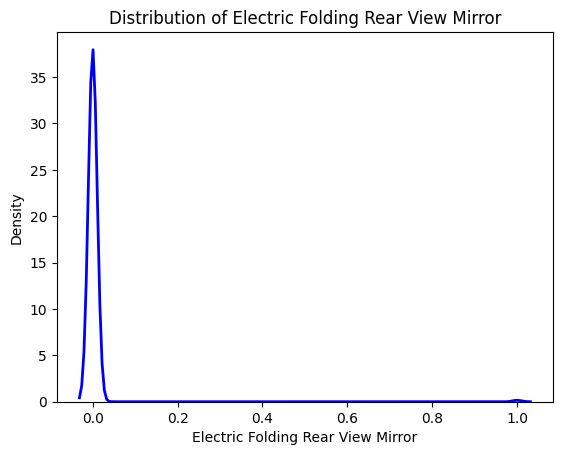

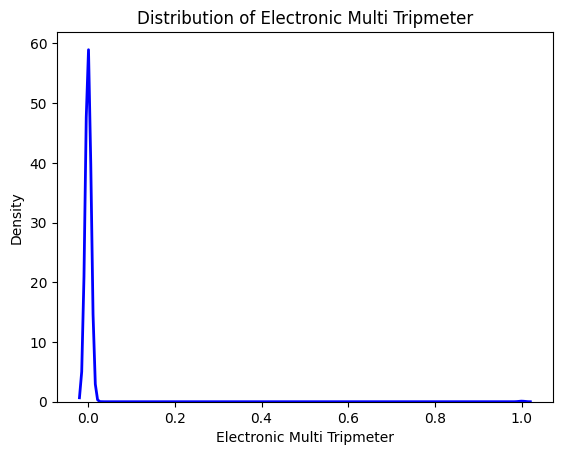

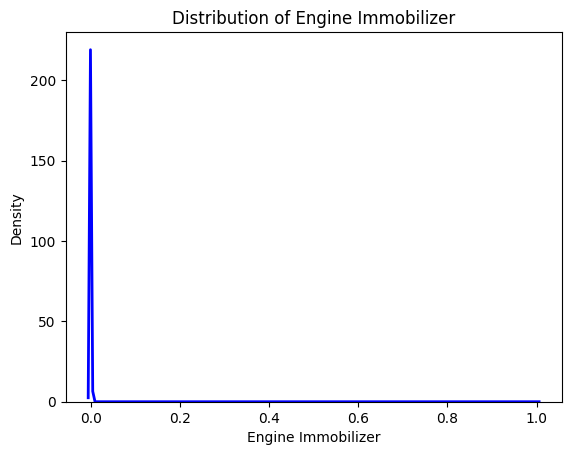

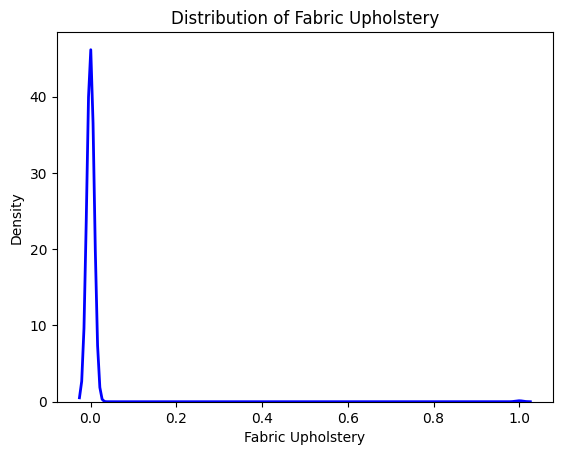

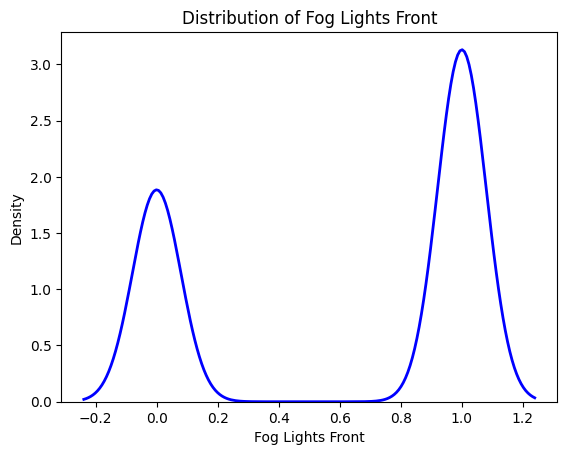

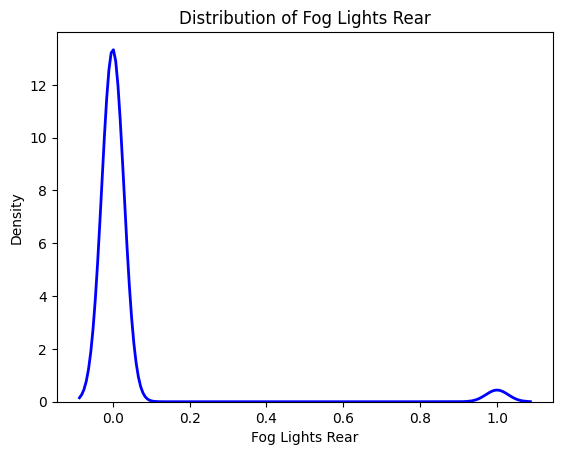

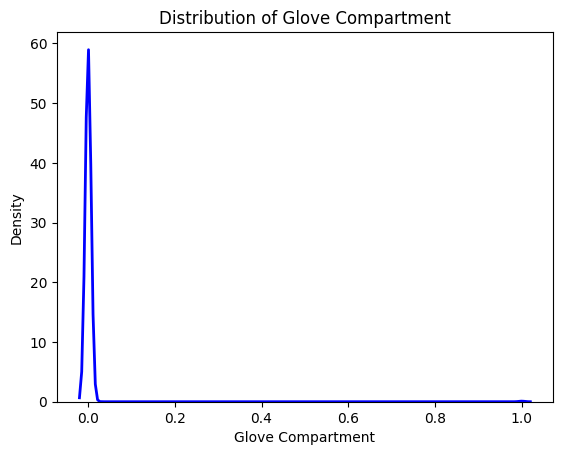

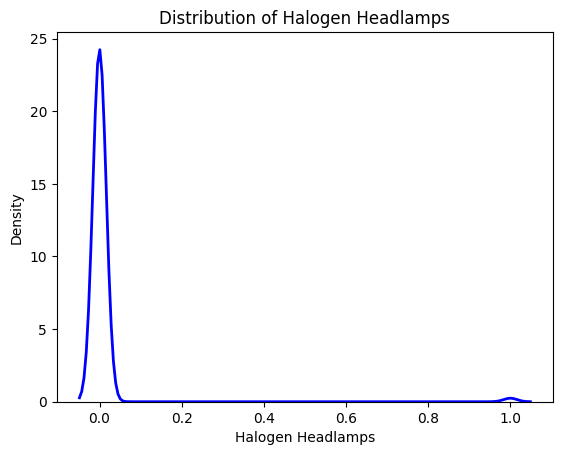

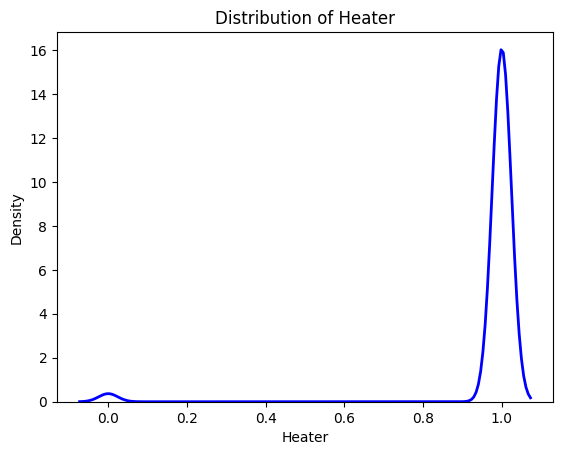

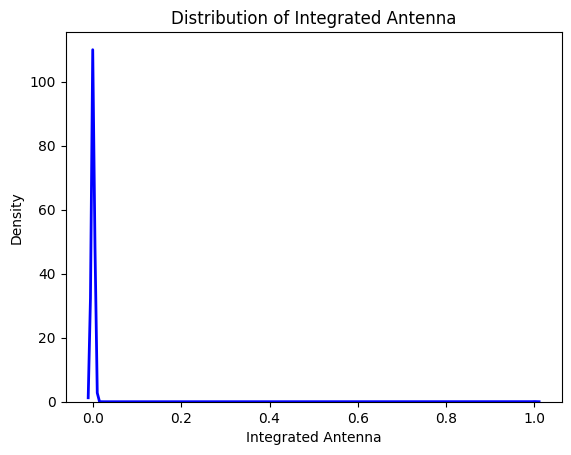

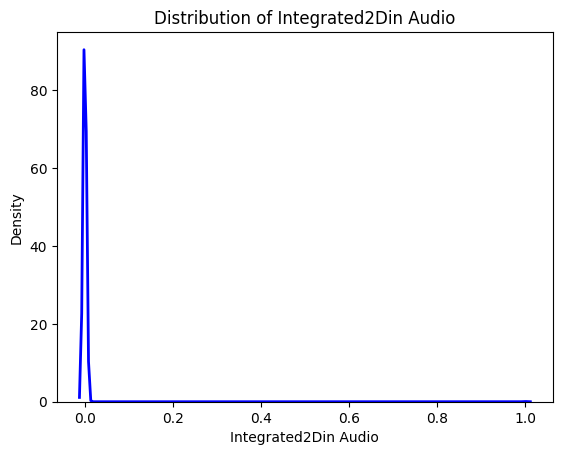

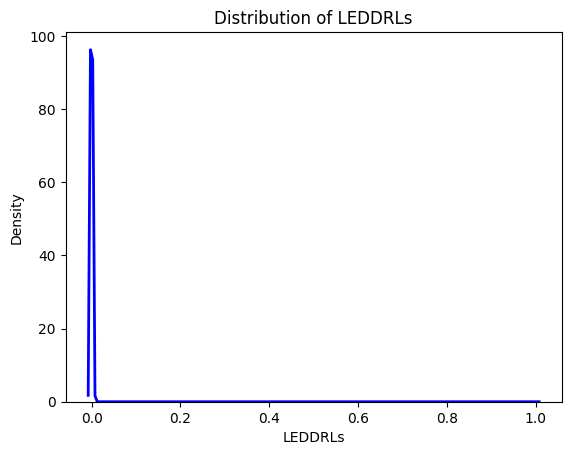

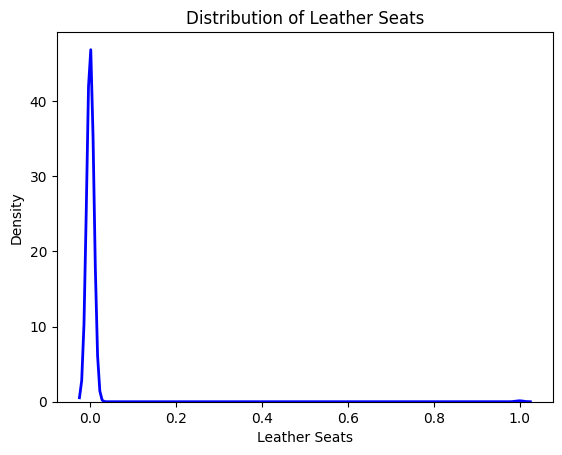

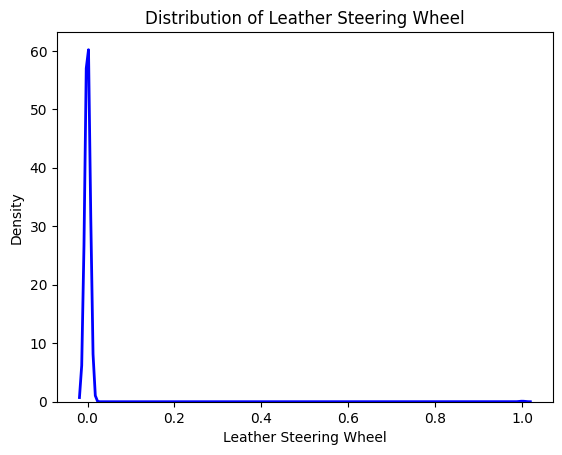

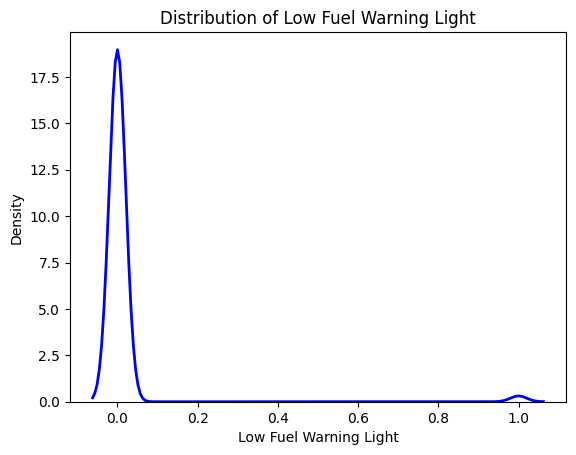

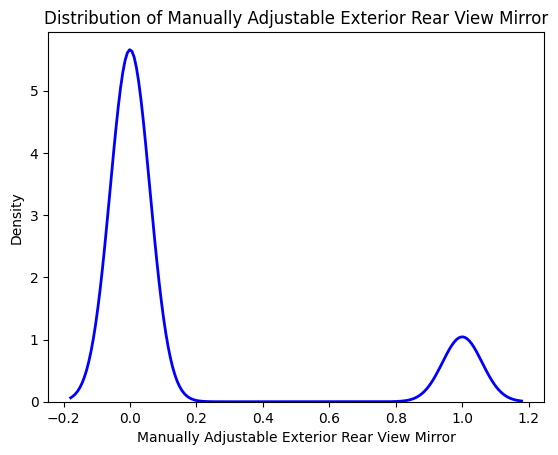

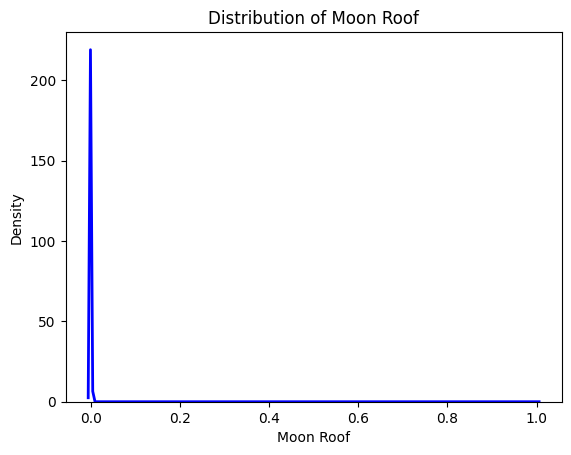

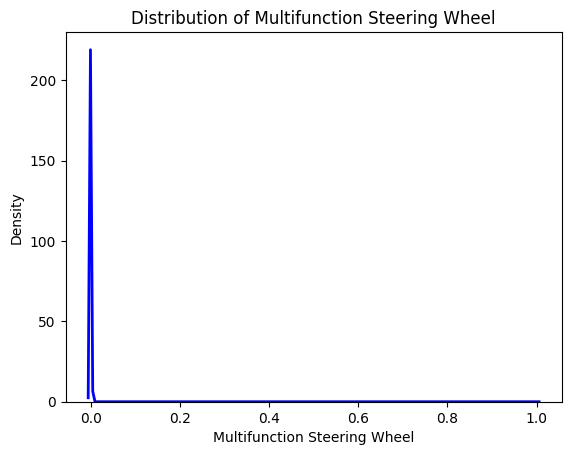

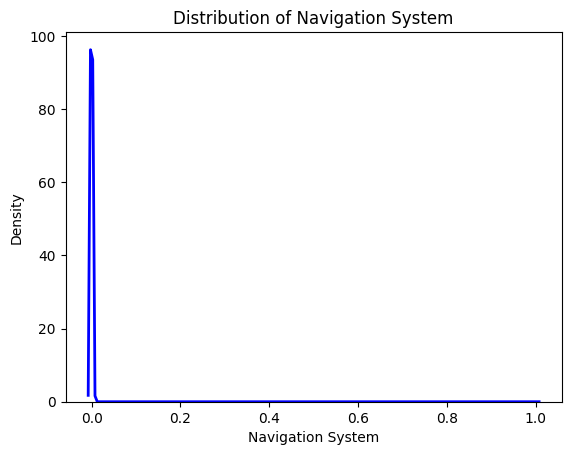

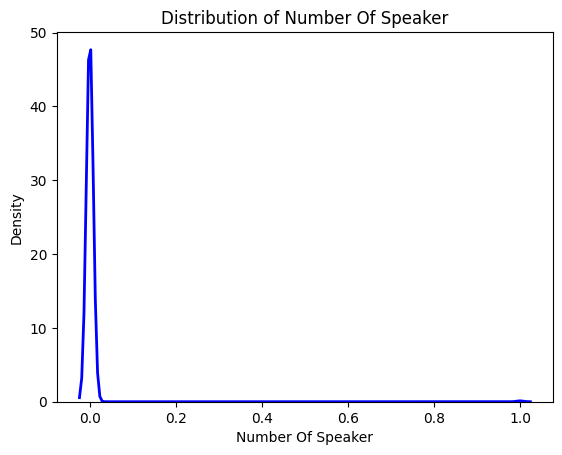

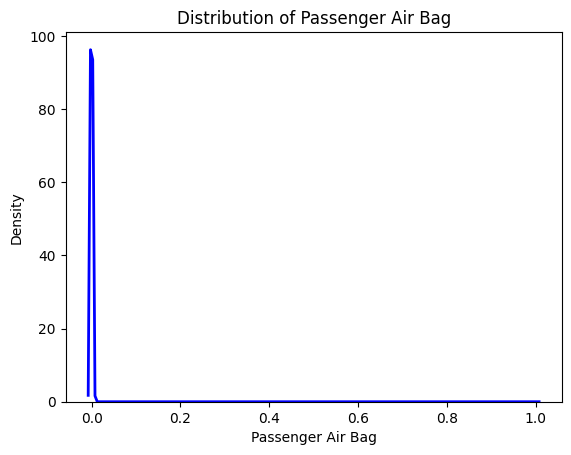

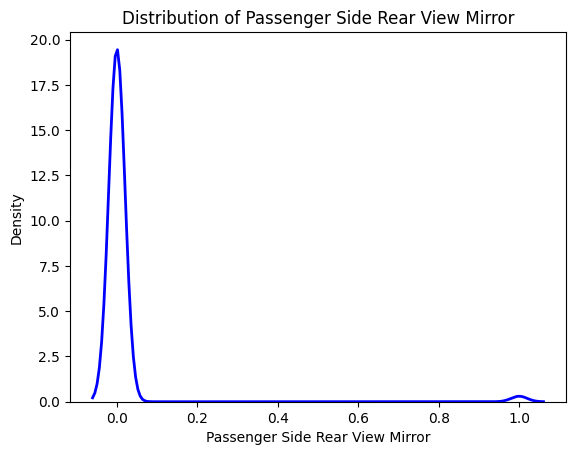

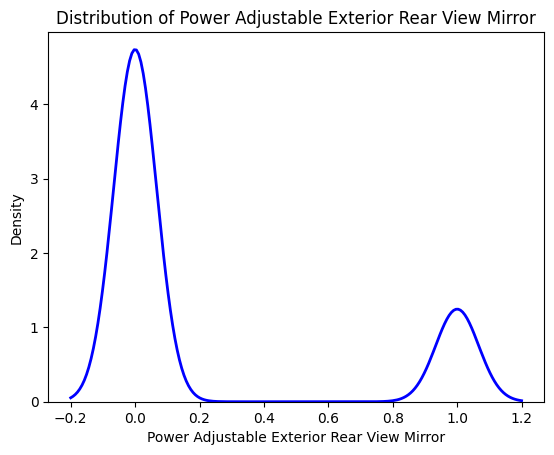

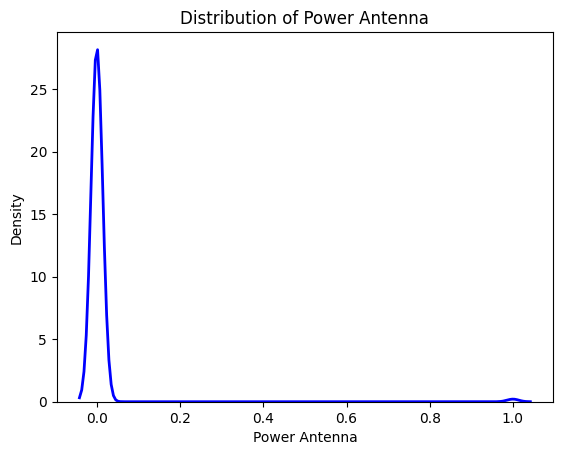

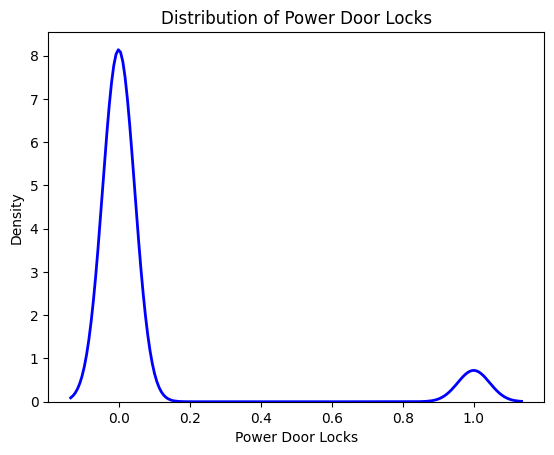

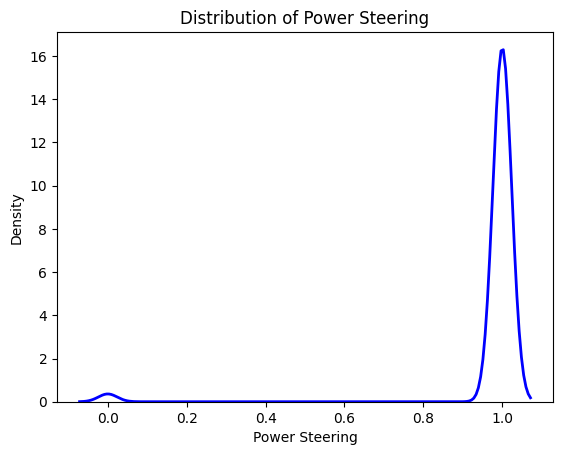

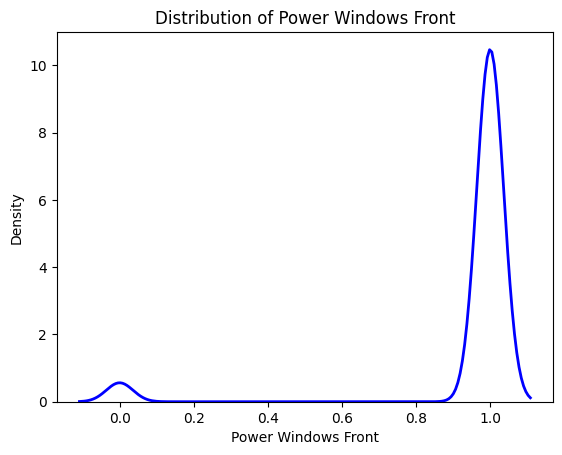

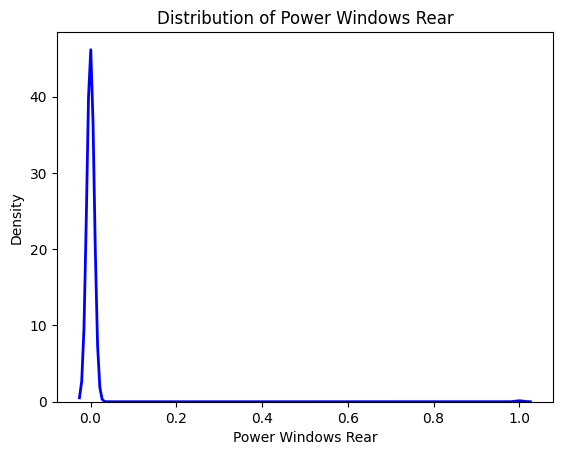

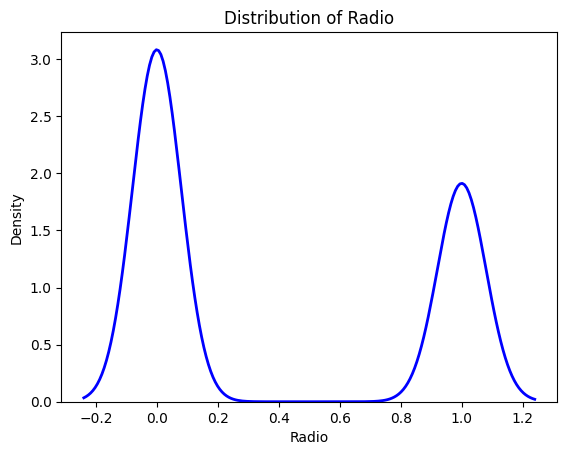

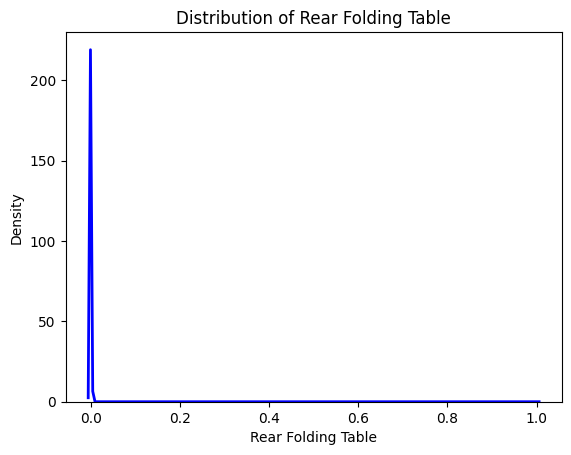

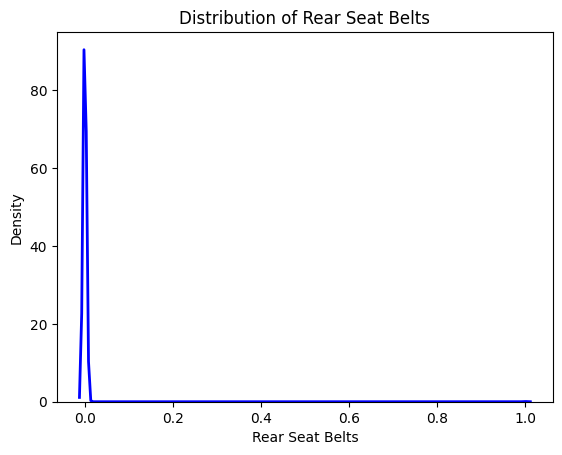

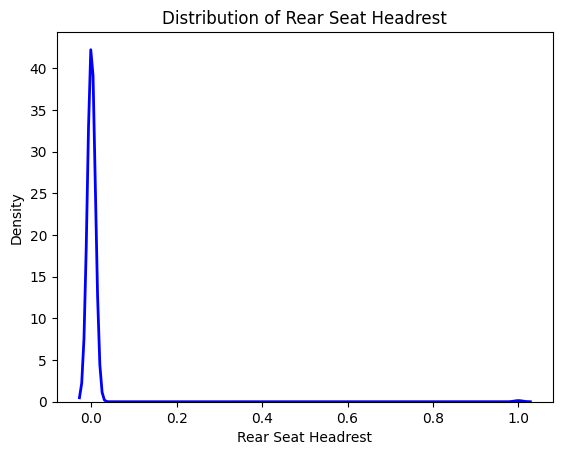

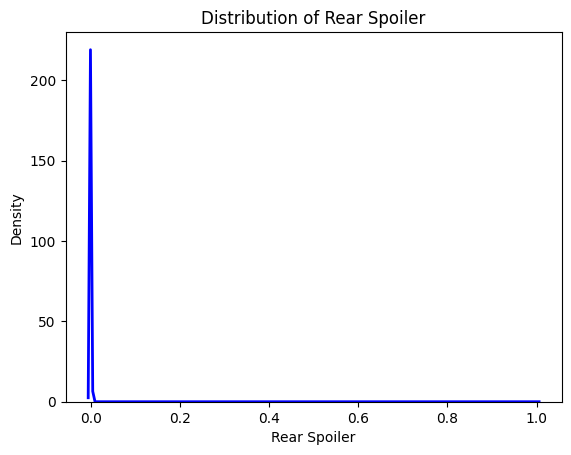

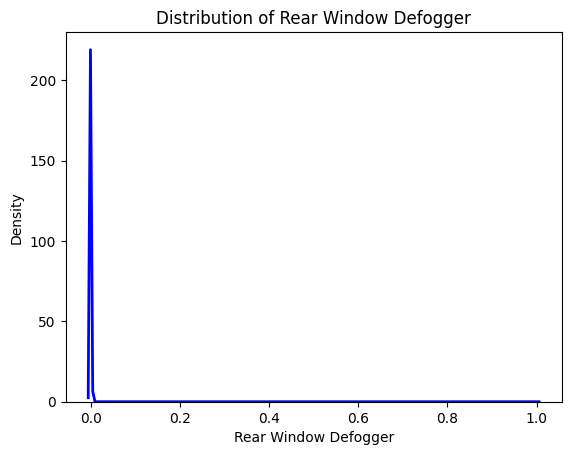

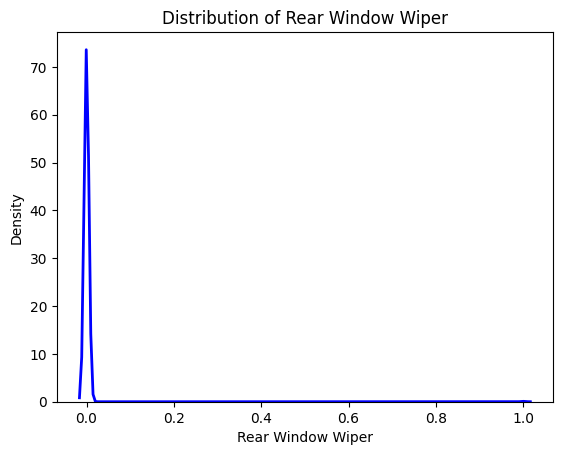

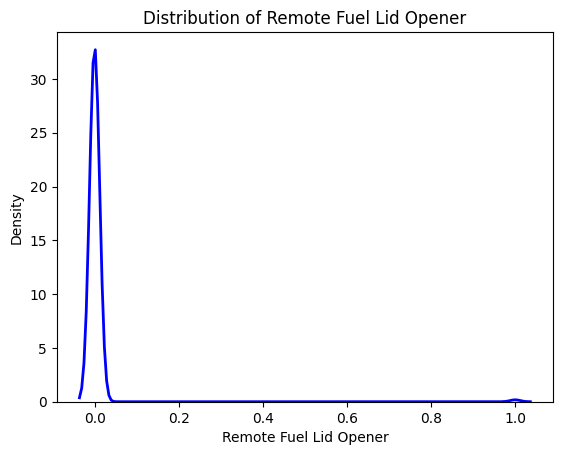

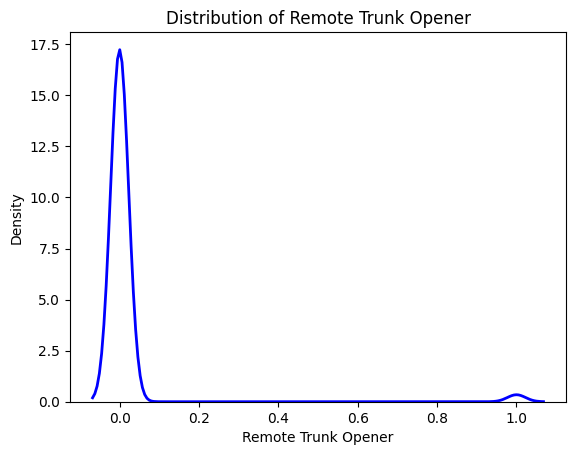

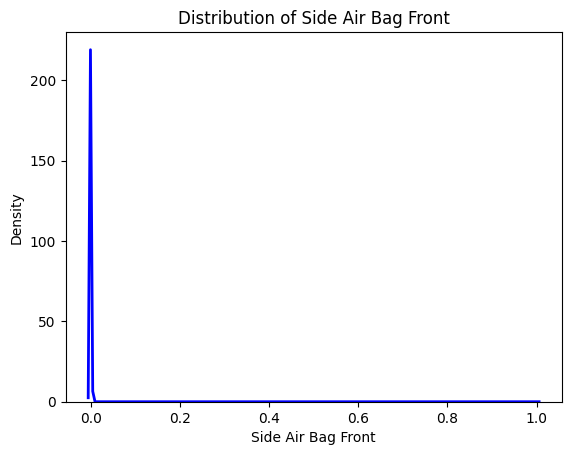

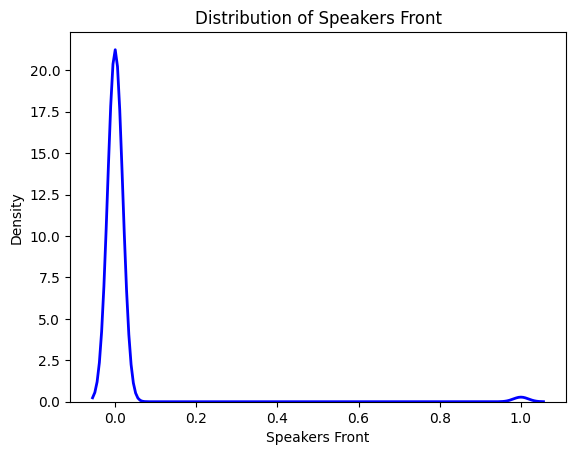

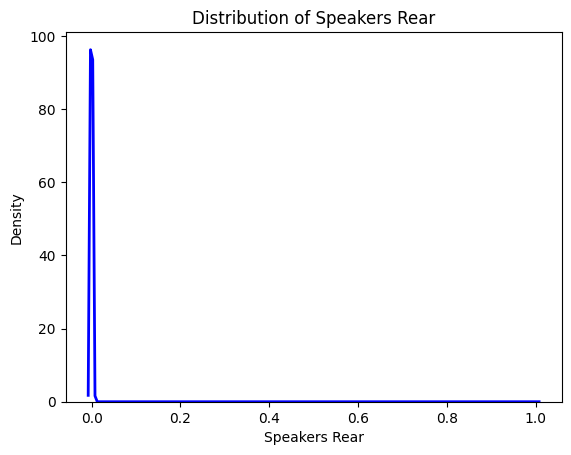

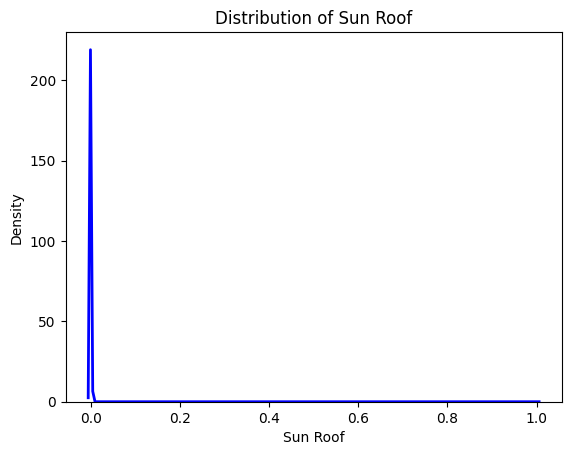

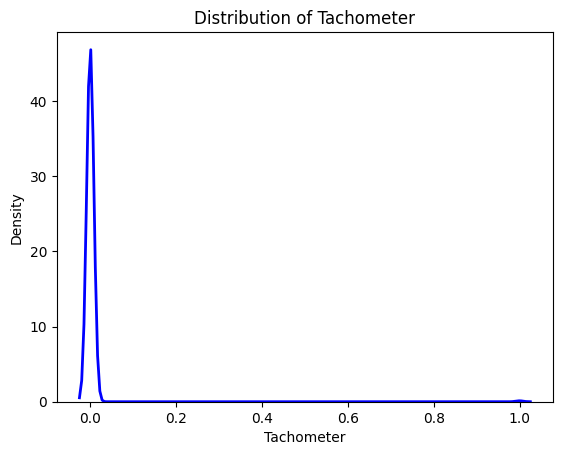

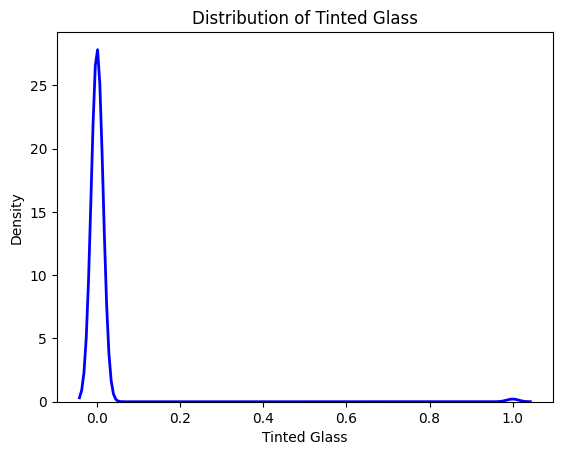

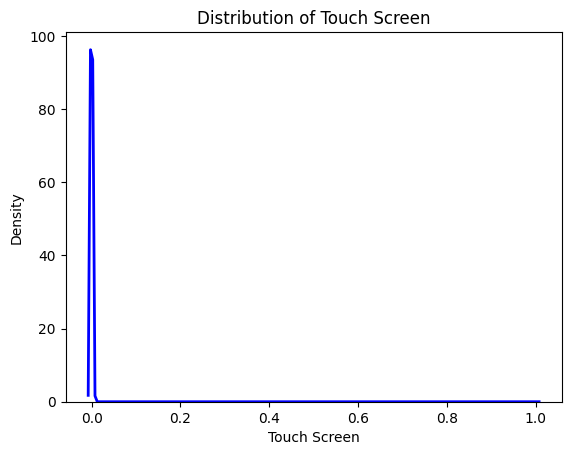

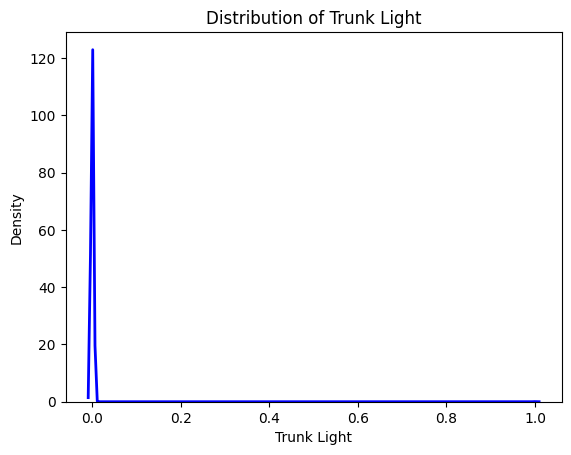

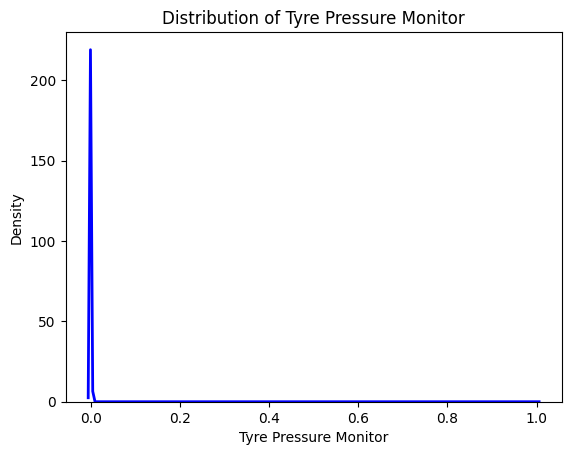

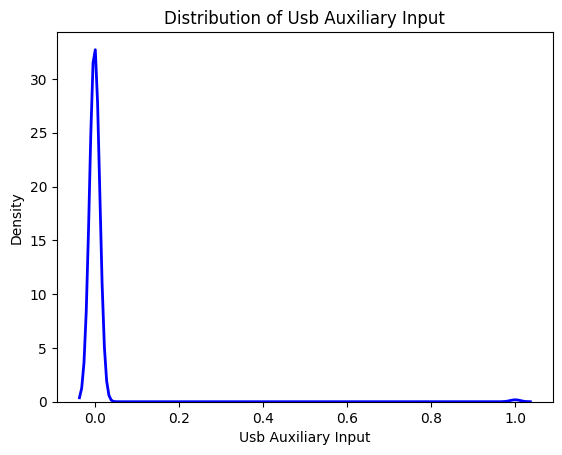

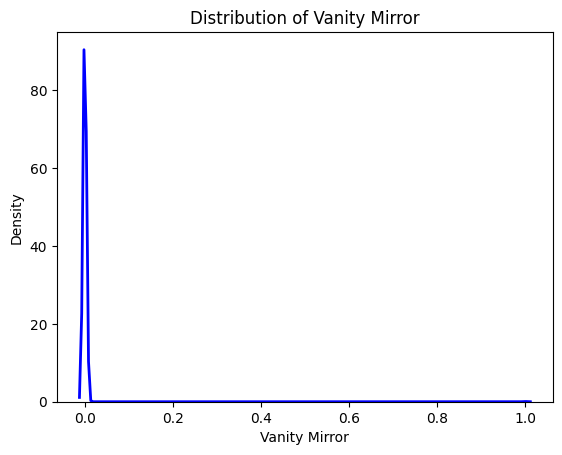

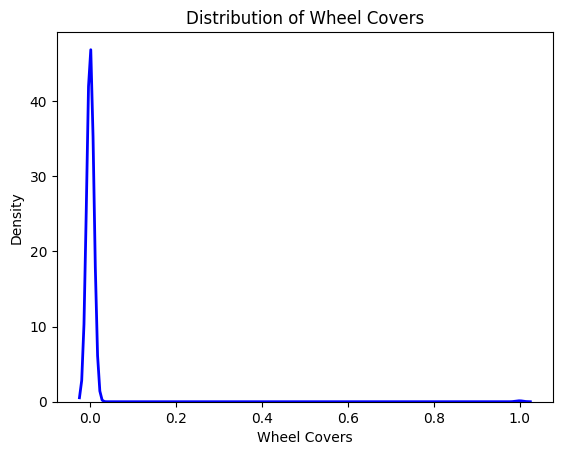

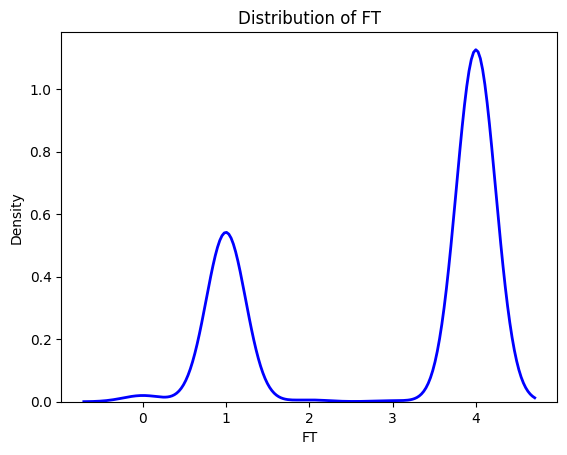

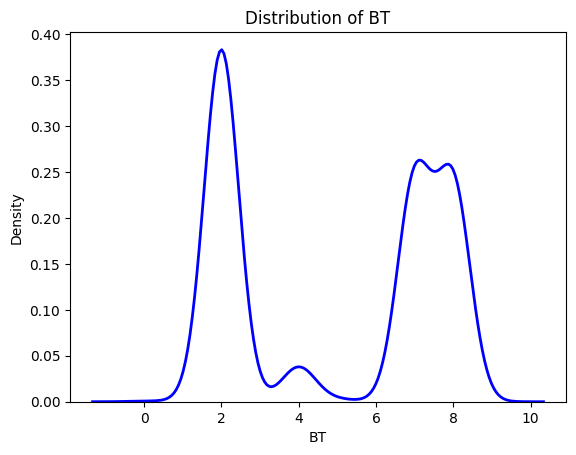

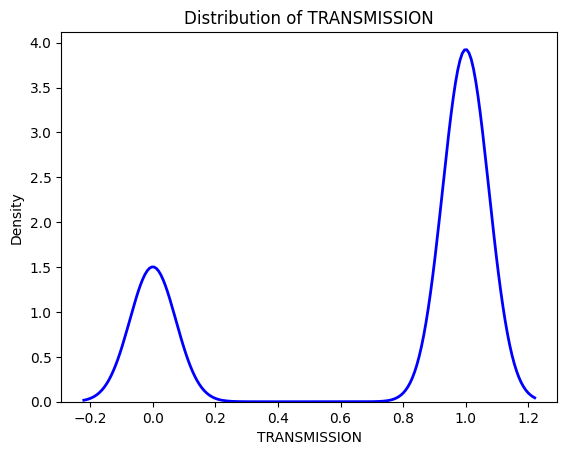

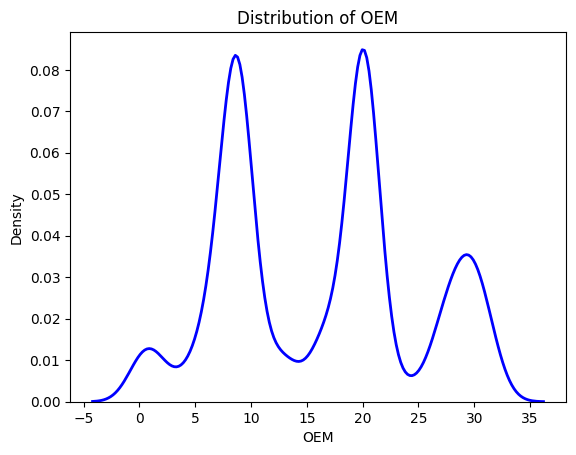

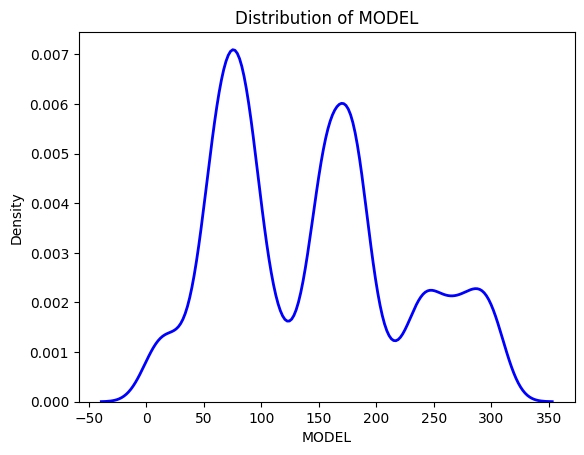

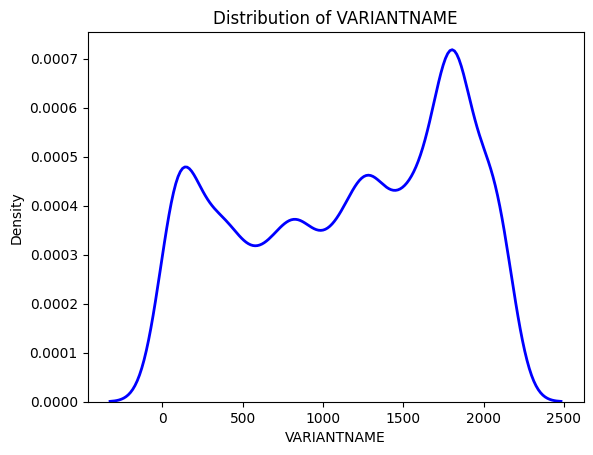

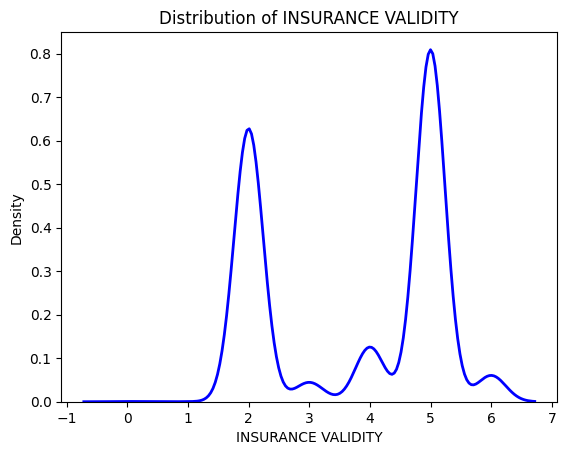

EXCEPTION COLIMNS ['Registration Year']


In [895]:
ex_col=[]
for x in df.columns:
   try:
        draw_hist(df , x)
   except:
       ex_col.append(x)
print("EXCEPTION COLIMNS",ex_col)

#### logtransformation for positively skewed data


In [896]:
col = df.columns
print(list(col))
positively_skewed_features=[]
e=[]
for x in df.columns:
    try:
        if df[x].skew() > 0.5:
            positively_skewed_features.append(x)
    except:
        e.append(x)

print(positively_skewed_features)

print(df['Max Power'].skew())

['km', 'ownerNo', 'modelYear', 'centralVariantId', 'price', 'Registration Year', 'Seats', 'Engine Displacement', 'Year of Manufacture', 'Mileage', 'Max Power', 'Torque', 'Wheel Size', 'Accessory Power Outlet', 'Adjustable Head Lights', 'Adjustable Seats', 'Adjustable Steering', 'Air Conditioner', 'Air Quality Control', 'Alloy Wheels', 'Anti Lock Braking System', 'Anti Theft Alarm', 'Audio System Remote Control', 'Bluetooth', 'Brake Assist', 'Cassette Player', 'Cd Changer', 'Cd Player', 'Centeral Locking', 'Child Safety Locks', 'Cruise Control', 'Cup Holders Front', 'Day Night Rear View Mirror', 'Digital Clock', 'Digital Odometer', 'Drive Modes', 'Driver Air Bag', 'Driving Experience Control Eco', 'Dvd Player', 'Electric Folding Rear View Mirror', 'Electronic Multi Tripmeter', 'Engine Immobilizer', 'Fabric Upholstery', 'Fog Lights Front', 'Fog Lights Rear', 'Glove Compartment', 'Halogen Headlamps', 'Heater', 'Integrated Antenna', 'Integrated2Din Audio', 'LEDDRLs', 'Leather Seats', 'Leat

In [897]:
log_transformer = FunctionTransformer(np.log1p,validate=True)
df[positively_skewed_features] = log_transformer.transform(df[positively_skewed_features])
df[positively_skewed_features]





c:\CarDekho\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,km,ownerNo,price,Seats,Engine Displacement,Mileage,Max Power,Torque,Accessory Power Outlet,Adjustable Seats,...,Speakers Rear,Sun Roof,Tachometer,Tinted Glass,Touch Screen,Trunk Light,Tyre Pressure Monitor,Usb Auxiliary Input,Vanity Mirror,Wheel Covers
0,11.695255,1.386294,12.899222,1.791759,6.906755,3.182212,4.220096,4.510860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.395344,1.098612,13.606025,1.791759,7.311886,2.890372,4.806559,5.017280,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.388487,0.693147,13.279369,1.791759,7.090077,3.212455,4.442651,4.744932,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.786673,0.693147,13.043322,1.791759,7.088409,3.000720,4.417152,4.742756,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.002117,0.693147,13.579789,1.791759,7.130099,3.204777,4.494239,5.303305,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,9.210440,0.693147,13.142168,1.791759,6.906755,3.267285,4.200355,4.499810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8365,11.695255,0.693147,12.100718,1.791759,6.680855,3.167161,3.877432,4.248495,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8366,10.819798,1.386294,13.217675,1.791759,7.493874,2.544747,5.231109,5.655992,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8367,10.596660,0.693147,11.849405,1.791759,7.088409,2.970414,4.463607,4.744932,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [898]:
def remove_outliers(df,column):
      
        q1=df[column].quantile(0.25)
        print("Q1",q1)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q1 + 1.5 * iqr
        df.query(f'@lower_bound < {column} <= @upper_bound', inplace=True)
        return df


In [899]:
#IQR method for remaining features
'''
iqr_col=[]
for col in df.columns:
    if col not in positively_skewed_features:
        iqr_col.append(col)
print(iqr_col)

for x in iqr_col:
    try:
     remove_outliers(df , x)
    except:
       print(f"exceptiom{x}")
'''
    

'\niqr_col=[]\nfor col in df.columns:\n    if col not in positively_skewed_features:\n        iqr_col.append(col)\nprint(iqr_col)\n\nfor x in iqr_col:\n    try:\n     remove_outliers(df , x)\n    except:\n       print(f"exceptiom{x}")\n'

#### Scaling

In [902]:
scaler =StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [901]:
df

,km,ownerNo,modelYear,centralVariantId,price,Registration Year,Seats,Engine Displacement,Year of Manufacture,Mileage,...,Usb Auxiliary Input,Vanity Mirror,Wheel Covers,FT,BT,TRANSMISSION,OEM,MODEL,VARIANTNAME,INSURANCE VALIDITY
0,11.695255,1.386294,2015,3979,12.899222,2015,1.791759,6.906755,2015.0,3.182212,...,0.0,0.0,0.0,4,2,1,20,160,1806,5
1,10.395344,1.098612,2018,6087,13.606025,2018,1.791759,7.311886,2018.0,2.890372,...,0.0,0.0,0.0,4,7,1,6,50,288,2
2,9.388487,0.693147,2018,2983,13.279369,2018,1.791759,7.090077,2018.0,3.212455,...,0.0,0.0,0.0,4,2,1,29,273,129,2
3,9.786673,0.693147,2014,1867,13.043322,2014,1.791759,7.088409,2014.0,3.000720,...,0.0,0.0,0.0,4,8,1,9,87,101,2
4,11.002117,0.693147,2015,4277,13.579789,2015,1.791759,7.130099,2015.0,3.204777,...,0.0,0.0,0.0,1,7,1,20,178,987,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,9.210440,0.693147,2022,8682,13.142168,2022,1.791759,6.906755,2022.0,3.267285,...,0.0,0.0,0.0,4,2,1,20,160,2051,5
8365,11.695255,0.693147,2014,3943,12.100718,2014,1.791759,6.680855,2014.0,3.167161,...,0.0,0.0,0.0,4,2,1,20,155,1268,5
8366,10.819798,1.386294,2011,4672,13.217675,2011,1.791759,7.493874,2011.0,2.544747,...,0.0,0.0,0.0,4,8,0,21,197,891,5
8367,10.596660,0.693147,2012,4144,11.849405,2012,1.791759,7.088409,2012.0,2.970414,...,0.0,0.0,0.0,4,2,1,20,175,2069,5


In [903]:
df.to_excel(r"../repository/processed_data/cardhekho_MAIN.xlsx")